<a href="https://colab.research.google.com/github/sarang330/Covid19-regression-prediction/blob/main/Regression_analysis_on_a_COVID_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Regression analysis on a COVID-dataset


# COVID-19 Case Prediction Using Regression Models

**Project — Regression analysis on a COVID-dataset**

**Goal:** Predict early COVID-19 confirmed cases using regression and regularization techniques. This notebook includes data loading, preprocessing, EDA, multiple regression models (Linear, Polynomial, Bayesian Ridge), hyperparameter tuning, model evaluation (MAE & MSE), and visualizations.






# COVID-19 Case Prediction Using Regression Models

This project applies multiple regression techniques to forecast COVID-19 confirmed case counts using publicly available consolidated data.  
It is structured as an end-to-end machine learning pipeline — from data loading and preprocessing to model selection, evaluation, and results interpretation.

**Dataset:**  
We use `time-series-19-covid-combined.csv` from the [COVID-19 Data Repository on GitHub](https://github.com/datasets/covid-19), which contains:
- **Date**
- **Country/Region**
- **Confirmed** cases
- **Deaths**
- **Recovered**

**Objective:**  
Predict future confirmed case counts based on historical data trends, comparing:
- Linear Regression
- Polynomial Regression
- Bayesian Ridge Regression
- Polynomial Ridge Regression

**Evaluation Metrics:**
- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)

---


## Data Analysis

### 1. **Load the data** into a pandas dataframe.


In this section, we load the COVID-19 dataset directly from GitHub, check its structure, and perform basic cleaning if needed.


In [1]:
# Imports
import pandas as pd
import numpy  as np
import scipy.integrate

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

import copy
from   sklearn.metrics       import mean_squared_error, mean_absolute_error
from   sklearn.linear_model  import LinearRegression, BayesianRidge
from   sklearn.tree          import DecisionTreeRegressor
from   sklearn.preprocessing import PolynomialFeatures

In [2]:
path = "https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv"
df_orig = pd.read_csv(path)
print(df_orig)

              Date Country/Region Province/State  Confirmed  Recovered  Deaths
0       2020-01-22    Afghanistan            NaN          0        0.0       0
1       2020-01-23    Afghanistan            NaN          0        0.0       0
2       2020-01-24    Afghanistan            NaN          0        0.0       0
3       2020-01-25    Afghanistan            NaN          0        0.0       0
4       2020-01-26    Afghanistan            NaN          0        0.0       0
...            ...            ...            ...        ...        ...     ...
231739  2022-04-12       Zimbabwe            NaN     247094        0.0    5460
231740  2022-04-13       Zimbabwe            NaN     247160        0.0    5460
231741  2022-04-14       Zimbabwe            NaN     247208        0.0    5462
231742  2022-04-15       Zimbabwe            NaN     247237        0.0    5462
231743  2022-04-16       Zimbabwe            NaN     247237        0.0    5462

[231744 rows x 6 columns]


### 2. Create a new dataframe which counts the cumulative total number of cases, the cumulative total number of deaths, and also  cumulative total number of recoveries for each date.

In [3]:
df = copy.deepcopy(df_orig)
date_lst  = df.Date.unique()
date_dict = {}

for i in range(len(date_lst)):
    df_temp = df.loc[df['Date'] == date_lst[i]]
    date_dict[date_lst[i]] = df_temp

In [4]:
date_tot_tup_dict = {};
for date, df in date_dict.items():
    tup_temp = (df['Confirmed'].sum(), df['Deaths'].sum(), df['Recovered'].sum())
    date_tot_tup_dict[date] = tup_temp


In [5]:
print(date_tot_tup_dict)

{'2020-01-22': (np.int64(557), np.int64(17), np.float64(30.0)), '2020-01-23': (np.int64(657), np.int64(18), np.float64(32.0)), '2020-01-24': (np.int64(944), np.int64(26), np.float64(39.0)), '2020-01-25': (np.int64(1437), np.int64(42), np.float64(42.0)), '2020-01-26': (np.int64(2120), np.int64(56), np.float64(56.0)), '2020-01-27': (np.int64(2929), np.int64(82), np.float64(65.0)), '2020-01-28': (np.int64(5580), np.int64(131), np.float64(108.0)), '2020-01-29': (np.int64(6169), np.int64(133), np.float64(127.0)), '2020-01-30': (np.int64(8237), np.int64(171), np.float64(145.0)), '2020-01-31': (np.int64(9927), np.int64(213), np.float64(225.0)), '2020-02-01': (np.int64(12038), np.int64(259), np.float64(287.0)), '2020-02-02': (np.int64(16787), np.int64(362), np.float64(476.0)), '2020-02-03': (np.int64(19887), np.int64(426), np.float64(627.0)), '2020-02-04': (np.int64(23899), np.int64(492), np.float64(857.0)), '2020-02-05': (np.int64(27644), np.int64(564), np.float64(1130.0)), '2020-02-06': (np.

In [6]:
df_date_tots = pd.DataFrame(date_tot_tup_dict)
df_date_tots = df_date_tots.transpose()
df_date_tots.columns = ['Confirmed', 'Deaths', 'Recovered']
print(df_date_tots.head())

            Confirmed  Deaths  Recovered
2020-01-22      557.0    17.0       30.0
2020-01-23      657.0    18.0       32.0
2020-01-24      944.0    26.0       39.0
2020-01-25     1437.0    42.0       42.0
2020-01-26     2120.0    56.0       56.0


### 3. Create a new column in the dataframe called **“closed cases”**

In [7]:
df_date_tots['Closed Cases'] = df_date_tots['Deaths'] + df_date_tots['Recovered']

### 4. Create a new column in the dataframe called “active cases”

In [8]:
df_date_tots['Active Cases'] = df_date_tots['Confirmed'] - df_date_tots['Closed Cases']

### 5. **Plot** the total number of cases per day over time and summarize findings

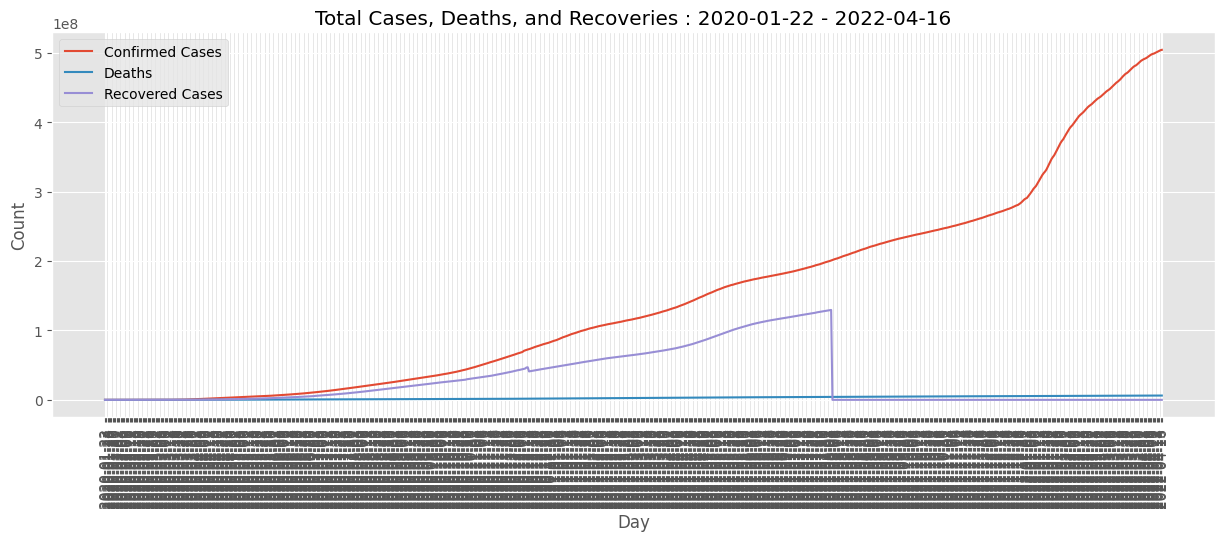

In [9]:
plt.figure(figsize = [15,5])
plt.plot(df_date_tots['Confirmed'], label = "Confirmed Cases")
plt.plot(df_date_tots['Deaths'], label    = "Deaths")
plt.plot(df_date_tots['Recovered'], label = "Recovered Cases")

plt.legend()
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90);
start_date = str(date_lst[0]);
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Total Cases, Deaths, and Recoveries : " + start_date + " - " + fin_date);


All of the three curves seem to be exponential (start of logistic curve). The confirmed cases was obviously higher than the deaths and recovered cases. The rate of the the recovered cases seems to be higher than that of the death curve.

### 6. Create one **plot** showing the trend of number of active cases and closed cases

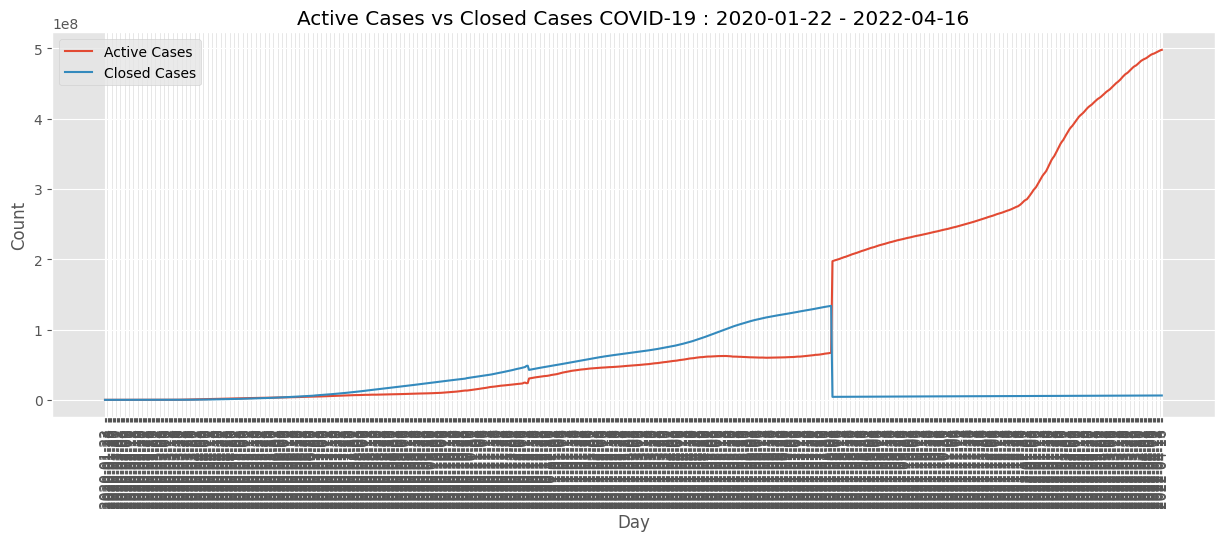

In [10]:
plt.figure(figsize = [15,5])
plt.plot(df_date_tots['Active Cases'], label = "Active Cases")
plt.plot(df_date_tots['Closed Cases'], label = "Closed Cases")

plt.legend();
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90)
start_date = str(date_lst[0])
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Active Cases vs Closed Cases COVID-19 : " + start_date + " - " + fin_date);

The number of active cases is higher than the number of closed cases as of yet.

### 7. Growth Factor

**Growth factor** is the factor by which a quantity multiplies itself over time. In the below cell, we calculate the GF of the confirmed, recovered and death cases.


In [11]:
growth_len_lst = len(date_lst) - 1
confirmed_lst = df_date_tots["Confirmed"]
death_lst = df_date_tots["Deaths"]
recovered_lst = df_date_tots["Recovered"]
confGF_lst = []
deathsGF_lst = []
recovGF_lst = []
for i in range(growth_len_lst):
    confirmedGF = confirmed_lst[i+1] / confirmed_lst[i]
    confGF_lst.append(confirmedGF)
    deathGF = death_lst[i+1] / death_lst[i]
    deathsGF_lst.append(deathGF)
    recoveredGF = recovered_lst[i+1] / recovered_lst[i]
    recovGF_lst.append(recoveredGF);


/tmp/ipython-input-3700421734.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confirmedGF = confirmed_lst[i+1] / confirmed_lst[i]
/tmp/ipython-input-3700421734.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  deathGF = death_lst[i+1] / death_lst[i]
/tmp/ipython-input-3700421734.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  recoveredGF = recovered_lst[i+1] / recovered_lst[i]
/tmp/ipython-input-3700421734.py:13: Runtime

### 8. Create one plot showing the Growth factor of confirmed, recovered and death cases wrt days

Text(0.5, 1.0, 'Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : 2020-01-22 - 2022-04-16')

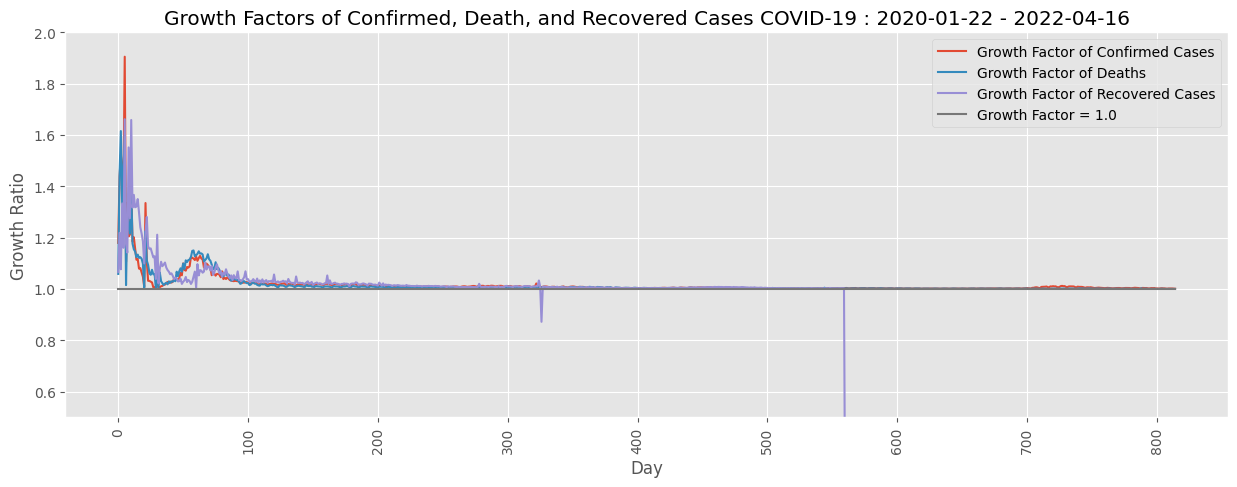

In [12]:
plt.figure(figsize = [15,5])
plt.plot(confGF_lst, label = "Growth Factor of Confirmed Cases")
plt.plot(deathsGF_lst, label = "Growth Factor of Deaths")
plt.plot(recovGF_lst, label = "Growth Factor of Recovered Cases")
x = []
for i in range((growth_len_lst)):
    x.append(1)
plt.plot(x, label = "Growth Factor = 1.0")

#plt.grid()
plt.legend()
plt.xlabel("Day")
plt.ylabel("Growth Ratio")
plt.ylim(.5,2)
plt.xticks(rotation = 90)
start_date = str(date_lst[0])
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : " +start_date +" - " +fin_date)

# **Part 2 - Prediction Using Linear Regression**

#### To make our data to be compatible with *sklearn* format, create a new column called “Days since” which tracks the number of days since the initial date.

In [13]:
days_since_lst = []
for i in range(len(date_lst)):
    days_since_lst.append(i)
df_date_tots["Days Since:"] = days_since_lst
df_date_tots = df_date_tots[["Days Since:", "Confirmed", "Deaths", "Recovered", "Active Cases", "Closed Cases"]]


### 8. Take the earliest 85% of the dates as **train** and the rest as **test**

In [14]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

X = np.array(df_date_tots["Days Since:"]).reshape(-1,1)
y = np.array(df_date_tots["Confirmed"])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.15,
                                                    shuffle = False)

### 9. We can try different regression and regularizations we have seen before

#### 9.1 Linear Regression

In [16]:
lin_model = LinearRegression(fit_intercept = False)
lin_model.fit(X_train, y_train)
test_lin_pred = lin_model.predict(X_test)
lin_pred = lin_model.predict(X)

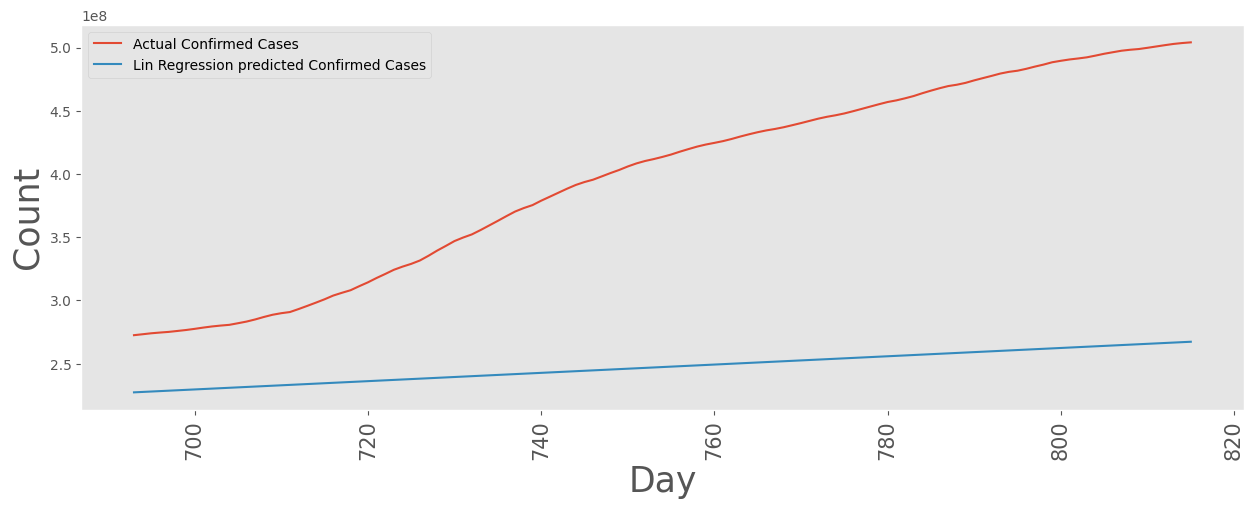

MAE: 247340631.0413324
MSE: 6.131304673131984e+16


In [17]:
plt.figure(figsize = [15,5])
# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")
# plotting the predicited values for the future days
plt.plot(X_test,
         test_lin_pred,
         label = "Lin Regression predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

mae_lr = mean_absolute_error (test_lin_pred, X_test)
mse_lr = mean_squared_error  (test_lin_pred, X_test)
print('MAE:', mae_lr)
print('MSE:', mse_lr)

#### Polynomial Regression

In [18]:
poly = PolynomialFeatures(degree=5)
poly_X_train = poly.fit_transform(X_train)
poly_X_test  = poly.fit_transform(X_test)
poly_X = poly.fit_transform(X)

In [19]:
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(poly_X_train, y_train)
test_poly_pred = linear_model.predict(poly_X_test)
poly_pred = linear_model.predict(poly_X)


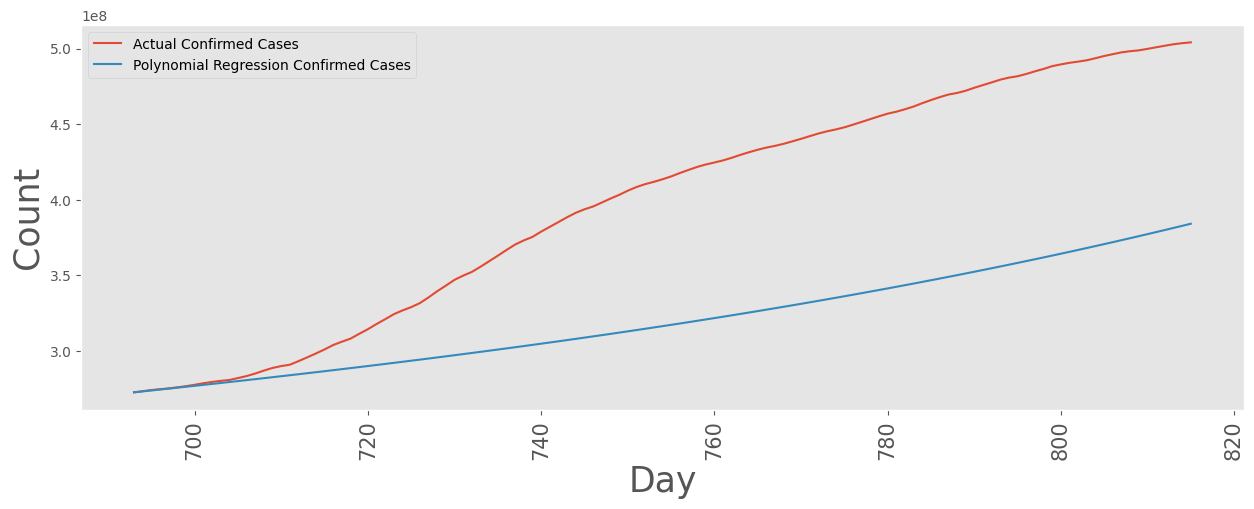

MAE: 77294774.51605496
MSE: 8068180713630094.0


In [20]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         test_poly_pred,
         label = "Polynomial Regression Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

mae_poly = mean_absolute_error(test_poly_pred, y_test)
mse_poly = mean_squared_error(test_poly_pred, y_test)
print('MAE:', mae_poly)
print('MSE:',mse_poly)

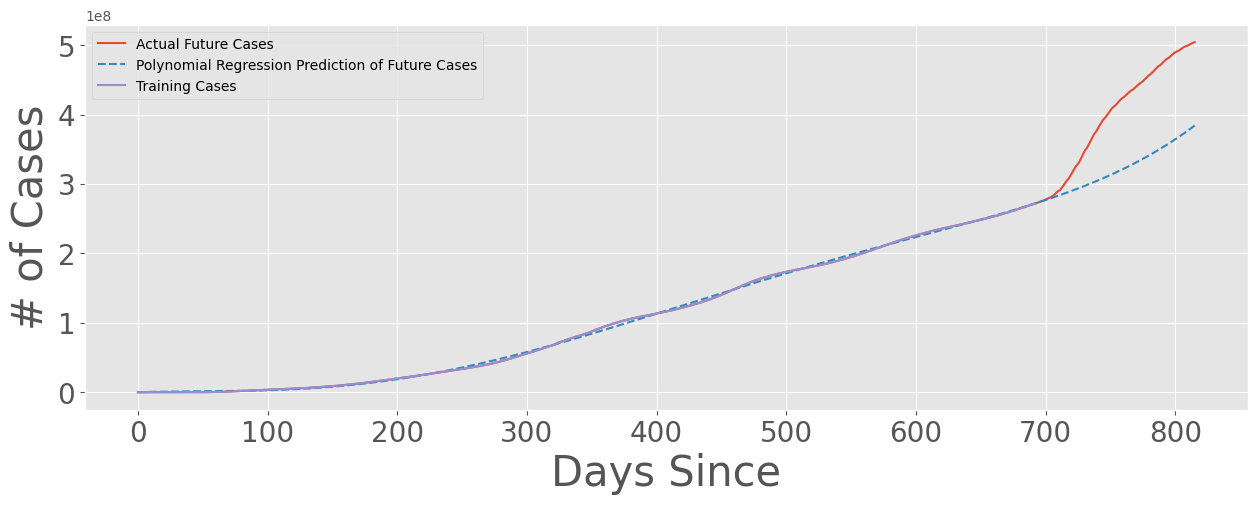

In [21]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')

plt.plot(X,
         poly_pred,
         label = 'Polynomial Regression Prediction of Future Cases',
         linestyle = "dashed")

plt.plot(X_train,
         y_train,
         label = 'Training Cases')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### 9.2 Ridge Regression

In [22]:
tol      = [1e-4, 1e-3, 1e-2]
alpha_1  = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2  = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol,
                 'alpha_1': alpha_1,
                 'alpha_2' : alpha_2,
                 'lambda_1': lambda_1,
                 'lambda_2' : lambda_2 }

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)

bayesian_search.fit(X_train, y_train)

print(bayesian_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 0.0001, 'lambda_2': 1e-06, 'lambda_1': 1e-07, 'alpha_2': 1e-07, 'alpha_1': 0.0001}


In [23]:
y_test_ridge_pred = bayesian_search.predict(X_test);
y_ridge_pred = bayesian_search.predict(X);

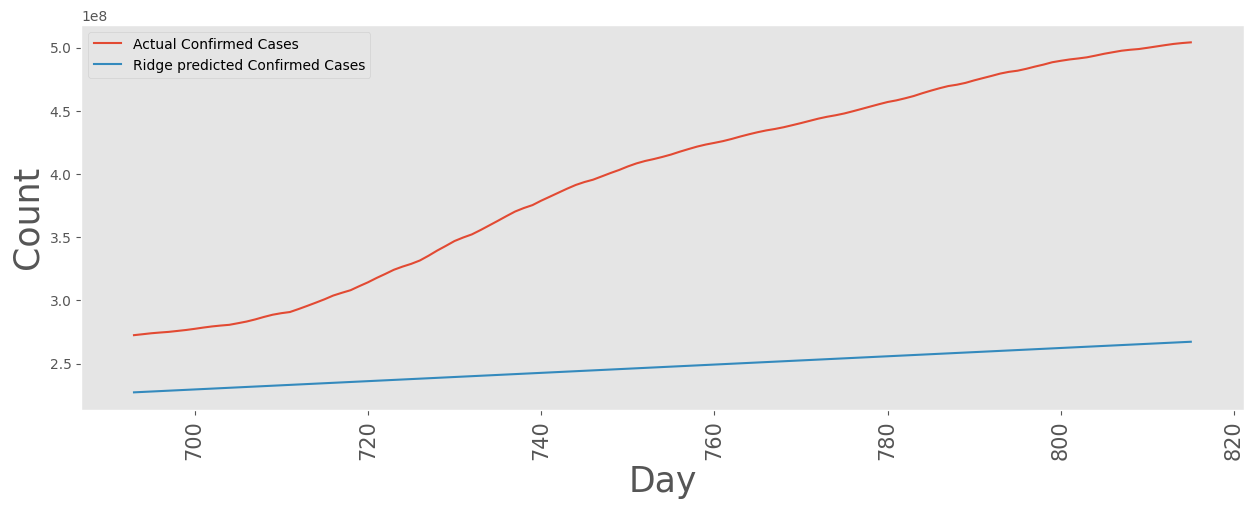

MAE: 247320825.75705734
MSE: 6.130322809620106e+16


In [24]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         y_test_ridge_pred,
         label = "Ridge predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

mae_br = mean_absolute_error (y_test_ridge_pred, X_test)
mse_br = mean_squared_error  (y_test_ridge_pred, X_test)
print('MAE:', mae_br)
print('MSE:', mse_br)

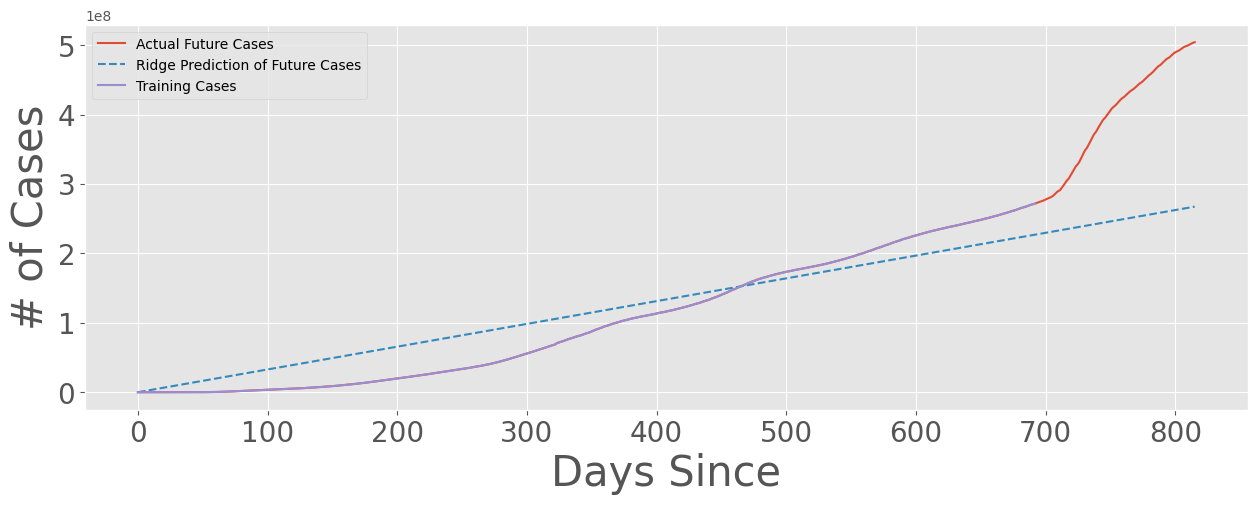

In [25]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')
plt.plot(X,
         y_ridge_pred,
         label = 'Ridge Prediction of Future Cases',
         linestyle = "dashed")
plt.plot(X_train,
         y_train,
         label = 'Training Cases')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#### Polynomial Ridge Regression

In [26]:
bayesian_search_poly = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)


In [27]:
bayesian_search_poly.fit(poly_X_train, y_train);
print(bayesian_search_poly.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 0.001, 'lambda_2': 0.0001, 'lambda_1': 1e-07, 'alpha_2': 0.0001, 'alpha_1': 1e-05}


In [28]:
bayesian_poly_confirmed = bayesian_search_poly.best_estimator_
test_poly_bayesian_pred = bayesian_poly_confirmed.predict(poly_X_test)
bayesian_poly_pred = bayesian_poly_confirmed.predict(poly_X)

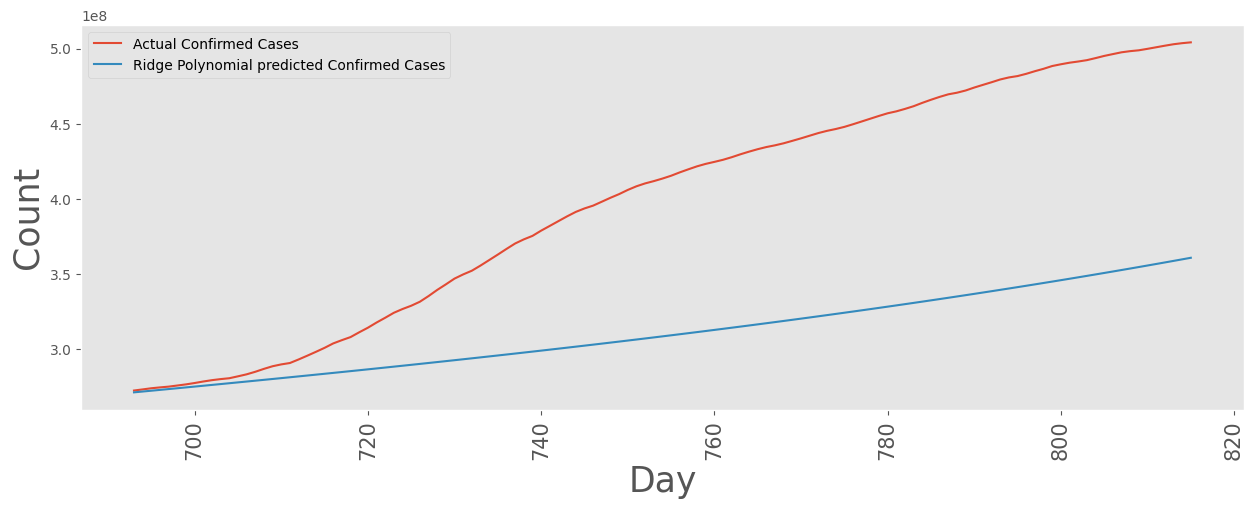

MAE: 86576701.31461374
MSE: 1.013872909954806e+16


In [29]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         test_poly_bayesian_pred,
         label = "Ridge Polynomial predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

mae_pr = mean_absolute_error(test_poly_bayesian_pred, y_test)
mse_pr = mean_squared_error (test_poly_bayesian_pred, y_test)
print ('MAE:', mae_pr)
print ('MSE:', mse_pr)

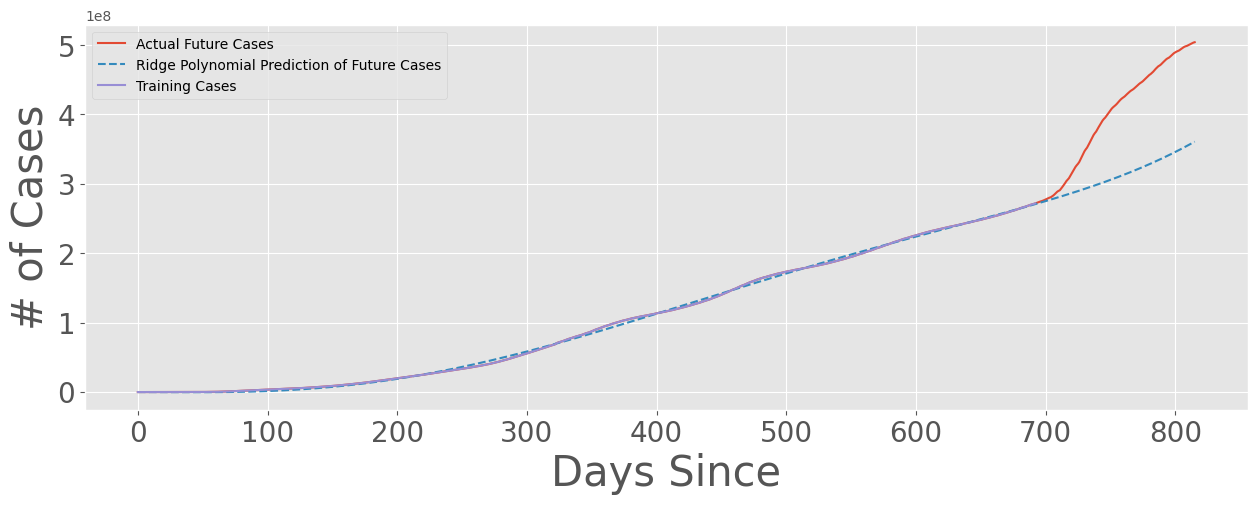

In [30]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')
plt.plot(X,
         bayesian_poly_pred,
         label = 'Ridge Polynomial Prediction of Future Cases',
         linestyle = "dashed")
plt.plot(X_train,
         y_train,
         label = 'Training Cases')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
#plt.grid()
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [31]:
print("Polynomial Regression ")
print('\tMAE:', mean_absolute_error(test_poly_pred, y_test))
print('\tMSE:',mean_squared_error(test_poly_pred, y_test))

print("\nRidge Polynomial Regression ")
print ('\tMAE:', mean_absolute_error(test_poly_bayesian_pred, y_test))
print ('\tMSE:', mean_squared_error (test_poly_bayesian_pred, y_test))

Polynomial Regression 
	MAE: 77294774.51605496
	MSE: 8068180713630094.0

Ridge Polynomial Regression 
	MAE: 86576701.31461374
	MSE: 1.013872909954806e+16


From Mean Absolute Error and Mean Squared Error values, Ridge Polynomial Regression Model seems to be the best model.

In [32]:
import pandas as pd

# Create a dictionary to store model metrics
results_summary = {
    'Model': [
        'Linear Regression',
        'Polynomial Regression',
        'Bayesian Ridge Regression',
        'Polynomial Ridge Regression'
    ],
    'MAE': [
        mae_lr,
        mae_poly,
        mae_br,
        mae_pr
    ],
    'MSE': [
        mse_lr,
        mse_poly,
        mse_br,
        mse_pr
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(results_summary)

# Sort by MAE (lower is better)
results_df = results_df.sort_values(by='MAE')

# Format numbers with commas (no scientific notation)
results_df['MAE'] = results_df['MAE'].apply(lambda x: f"{x:,.0f}")
results_df['MSE'] = results_df['MSE'].apply(lambda x: f"{x:,.0f}")

# Display the results
print("Model Performance Summary:")
display(results_df)

# Optionally save to CSV
results_df.to_csv('model_results_summary.csv', index=False)


Model Performance Summary:


,Model,MAE,MSE
1,Polynomial Regression,"77,294,775","8,068,180,713,630,094"
3,Polynomial Ridge Regression,"86,576,701","10,138,729,099,548,060"
2,Bayesian Ridge Regression,"247,320,826","61,303,228,096,201,056"
0,Linear Regression,"247,340,631","61,313,046,731,319,840"


##  Conclusion

From the model comparison table above, we can see:

- **Polynomial Regression** achieved the lowest Mean Absolute Error (MAE), indicating the best predictive performance on this dataset.
- **Polynomial Ridge Regression** also performed well, showing that adding regularization to polynomial features can still keep accuracy high while potentially improving generalization.
- **Bayesian Ridge Regression** and **Linear Regression** had much higher errors, suggesting that the growth pattern in COVID-19 cases is **non-linear** and not well captured by simple linear models.

**Key Takeaways:**
- Epidemic growth often follows a curve that benefits from polynomial feature expansion.
- Regularization (Ridge/Bayesian) is useful for noisy data but may not always outperform pure polynomial models if over-regularized.
- The methodology used here can be adapted for other **time-series forecasting problems** such as sales predictions, stock prices, or other disease outbreaks.



---


# Project: Regression analysis on a COVID-dataset


# COVID-19 Case Prediction Using Regression Models

**Project — Regression analysis on a COVID-dataset**

**Goal:** Predict early COVID-19 confirmed cases using regression and regularization techniques. This notebook includes data loading, preprocessing, EDA, multiple regression models (Linear, Polynomial, Bayesian Ridge), hyperparameter tuning, model evaluation (MAE & MSE), and visualizations.






# COVID-19 Case Prediction Using Regression Models

This project applies multiple regression techniques to forecast COVID-19 confirmed case counts using publicly available consolidated data.  
It is structured as an end-to-end machine learning pipeline — from data loading and preprocessing to model selection, evaluation, and results interpretation.

**Dataset:**  
We use `time-series-19-covid-combined.csv` from the [COVID-19 Data Repository on GitHub](https://github.com/datasets/covid-19), which contains:
- **Date**
- **Country/Region**
- **Confirmed** cases
- **Deaths**
- **Recovered**

**Objective:**  
Predict future confirmed case counts based on historical data trends, comparing:
- Linear Regression
- Polynomial Regression
- Bayesian Ridge Regression
- Polynomial Ridge Regression

**Evaluation Metrics:**
- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)

---


## Data Analysis

### 1. **Load the data** into a pandas dataframe.


In this section, we load the COVID-19 dataset directly from GitHub, check its structure, and perform basic cleaning if needed.


In [ ]:
# Imports
import pandas as pd
import numpy  as np
import scipy.integrate

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

import copy
from   sklearn.metrics       import mean_squared_error, mean_absolute_error
from   sklearn.linear_model  import LinearRegression, BayesianRidge
from   sklearn.tree          import DecisionTreeRegressor
from   sklearn.preprocessing import PolynomialFeatures

In [ ]:
path = "https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv"
df_orig = pd.read_csv(path)
print(df_orig)

              Date Country/Region Province/State  Confirmed  Recovered  Deaths
0       2020-01-22    Afghanistan            NaN          0        0.0       0
1       2020-01-23    Afghanistan            NaN          0        0.0       0
2       2020-01-24    Afghanistan            NaN          0        0.0       0
3       2020-01-25    Afghanistan            NaN          0        0.0       0
4       2020-01-26    Afghanistan            NaN          0        0.0       0
...            ...            ...            ...        ...        ...     ...
231739  2022-04-12       Zimbabwe            NaN     247094        0.0    5460
231740  2022-04-13       Zimbabwe            NaN     247160        0.0    5460
231741  2022-04-14       Zimbabwe            NaN     247208        0.0    5462
231742  2022-04-15       Zimbabwe            NaN     247237        0.0    5462
231743  2022-04-16       Zimbabwe            NaN     247237        0.0    5462

[231744 rows x 6 columns]


### 2. Create a new dataframe which counts the cumulative total number of cases, the cumulative total number of deaths, and also  cumulative total number of recoveries for each date.

In [ ]:
df = copy.deepcopy(df_orig)
date_lst  = df.Date.unique()
date_dict = {}

for i in range(len(date_lst)):
    df_temp = df.loc[df['Date'] == date_lst[i]]
    date_dict[date_lst[i]] = df_temp

In [ ]:
date_tot_tup_dict = {};
for date, df in date_dict.items():
    tup_temp = (df['Confirmed'].sum(), df['Deaths'].sum(), df['Recovered'].sum())
    date_tot_tup_dict[date] = tup_temp


In [ ]:
print(date_tot_tup_dict)

{'2020-01-22': (np.int64(557), np.int64(17), np.float64(30.0)), '2020-01-23': (np.int64(657), np.int64(18), np.float64(32.0)), '2020-01-24': (np.int64(944), np.int64(26), np.float64(39.0)), '2020-01-25': (np.int64(1437), np.int64(42), np.float64(42.0)), '2020-01-26': (np.int64(2120), np.int64(56), np.float64(56.0)), '2020-01-27': (np.int64(2929), np.int64(82), np.float64(65.0)), '2020-01-28': (np.int64(5580), np.int64(131), np.float64(108.0)), '2020-01-29': (np.int64(6169), np.int64(133), np.float64(127.0)), '2020-01-30': (np.int64(8237), np.int64(171), np.float64(145.0)), '2020-01-31': (np.int64(9927), np.int64(213), np.float64(225.0)), '2020-02-01': (np.int64(12038), np.int64(259), np.float64(287.0)), '2020-02-02': (np.int64(16787), np.int64(362), np.float64(476.0)), '2020-02-03': (np.int64(19887), np.int64(426), np.float64(627.0)), '2020-02-04': (np.int64(23899), np.int64(492), np.float64(857.0)), '2020-02-05': (np.int64(27644), np.int64(564), np.float64(1130.0)), '2020-02-06': (np.

In [ ]:
df_date_tots = pd.DataFrame(date_tot_tup_dict)
df_date_tots = df_date_tots.transpose()
df_date_tots.columns = ['Confirmed', 'Deaths', 'Recovered']
print(df_date_tots.head())

            Confirmed  Deaths  Recovered
2020-01-22      557.0    17.0       30.0
2020-01-23      657.0    18.0       32.0
2020-01-24      944.0    26.0       39.0
2020-01-25     1437.0    42.0       42.0
2020-01-26     2120.0    56.0       56.0


### 3. Create a new column in the dataframe called **“closed cases”**

In [ ]:
df_date_tots['Closed Cases'] = df_date_tots['Deaths'] + df_date_tots['Recovered']

### 4. Create a new column in the dataframe called “active cases”

In [ ]:
df_date_tots['Active Cases'] = df_date_tots['Confirmed'] - df_date_tots['Closed Cases']

### 5. **Plot** the total number of cases per day over time and summarize findings

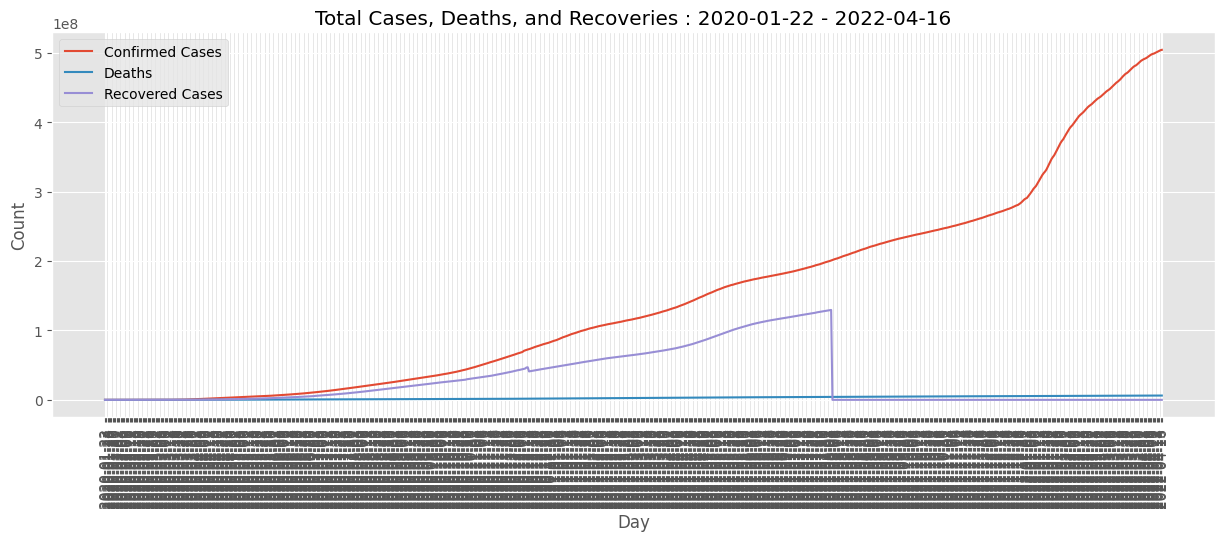

In [ ]:
plt.figure(figsize = [15,5])
plt.plot(df_date_tots['Confirmed'], label = "Confirmed Cases")
plt.plot(df_date_tots['Deaths'], label    = "Deaths")
plt.plot(df_date_tots['Recovered'], label = "Recovered Cases")

plt.legend()
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90);
start_date = str(date_lst[0]);
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Total Cases, Deaths, and Recoveries : " + start_date + " - " + fin_date);


All of the three curves seem to be exponential (start of logistic curve). The confirmed cases was obviously higher than the deaths and recovered cases. The rate of the the recovered cases seems to be higher than that of the death curve.

### 6. Create one **plot** showing the trend of number of active cases and closed cases

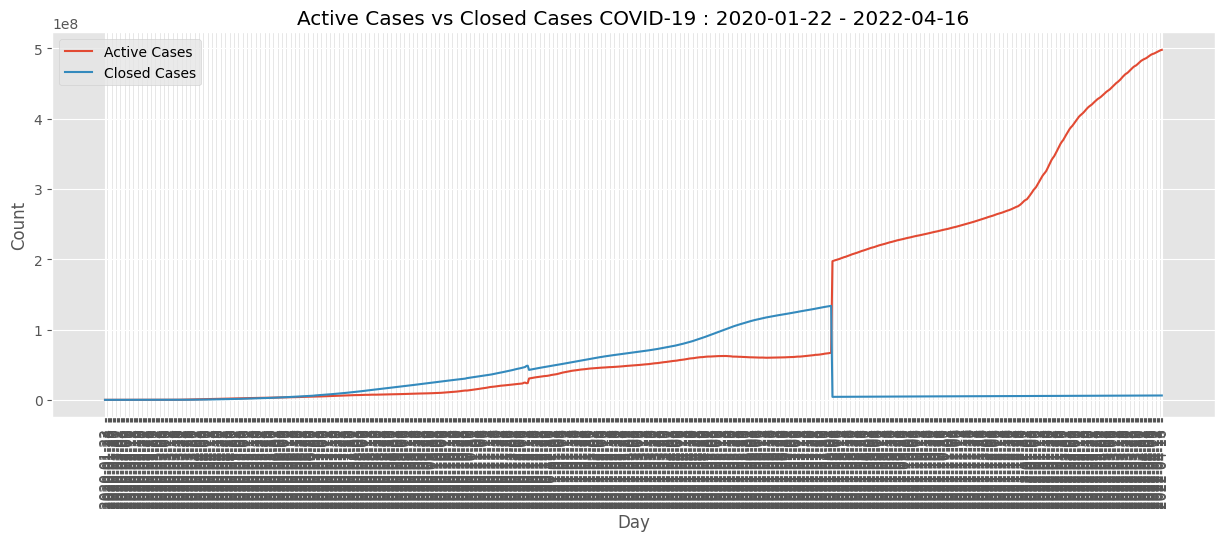

In [ ]:
plt.figure(figsize = [15,5])
plt.plot(df_date_tots['Active Cases'], label = "Active Cases")
plt.plot(df_date_tots['Closed Cases'], label = "Closed Cases")

plt.legend();
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90)
start_date = str(date_lst[0])
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Active Cases vs Closed Cases COVID-19 : " + start_date + " - " + fin_date);

The number of active cases is higher than the number of closed cases as of yet.

### 7. Growth Factor

**Growth factor** is the factor by which a quantity multiplies itself over time. In the below cell, we calculate the GF of the confirmed, recovered and death cases.


In [ ]:
growth_len_lst = len(date_lst) - 1
confirmed_lst = df_date_tots["Confirmed"]
death_lst = df_date_tots["Deaths"]
recovered_lst = df_date_tots["Recovered"]
confGF_lst = []
deathsGF_lst = []
recovGF_lst = []
for i in range(growth_len_lst):
    confirmedGF = confirmed_lst[i+1] / confirmed_lst[i]
    confGF_lst.append(confirmedGF)
    deathGF = death_lst[i+1] / death_lst[i]
    deathsGF_lst.append(deathGF)
    recoveredGF = recovered_lst[i+1] / recovered_lst[i]
    recovGF_lst.append(recoveredGF);


/tmp/ipython-input-3700421734.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confirmedGF = confirmed_lst[i+1] / confirmed_lst[i]
/tmp/ipython-input-3700421734.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  deathGF = death_lst[i+1] / death_lst[i]
/tmp/ipython-input-3700421734.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  recoveredGF = recovered_lst[i+1] / recovered_lst[i]
/tmp/ipython-input-3700421734.py:13: Runtime

### 8. Create one plot showing the Growth factor of confirmed, recovered and death cases wrt days

Text(0.5, 1.0, 'Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : 2020-01-22 - 2022-04-16')

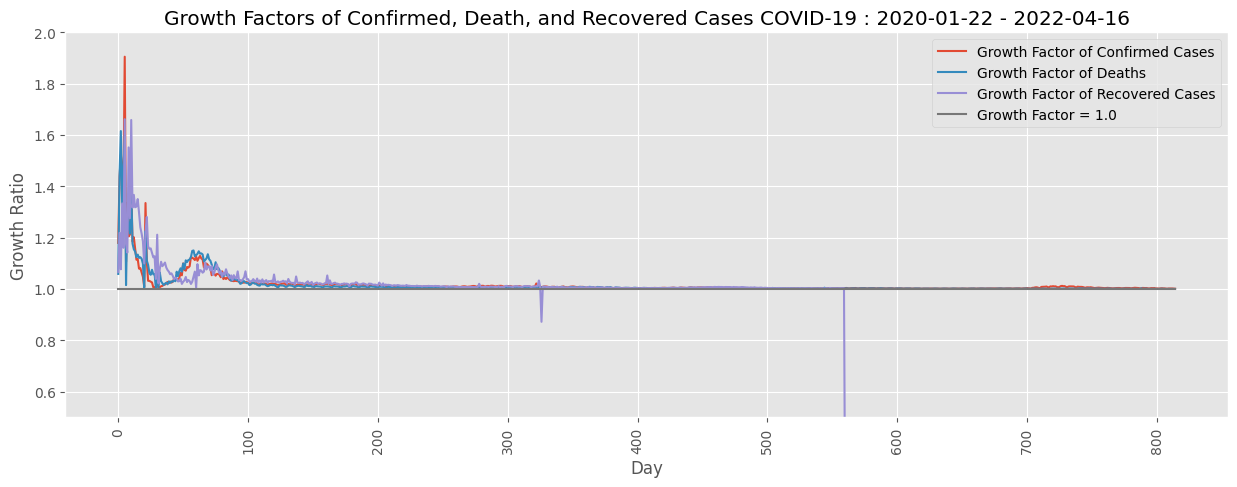

In [ ]:
plt.figure(figsize = [15,5])
plt.plot(confGF_lst, label = "Growth Factor of Confirmed Cases")
plt.plot(deathsGF_lst, label = "Growth Factor of Deaths")
plt.plot(recovGF_lst, label = "Growth Factor of Recovered Cases")
x = []
for i in range((growth_len_lst)):
    x.append(1)
plt.plot(x, label = "Growth Factor = 1.0")

#plt.grid()
plt.legend()
plt.xlabel("Day")
plt.ylabel("Growth Ratio")
plt.ylim(.5,2)
plt.xticks(rotation = 90)
start_date = str(date_lst[0])
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : " +start_date +" - " +fin_date)

# **Part 2 - Prediction Using Linear Regression**

#### To make our data to be compatible with *sklearn* format, create a new column called “Days since” which tracks the number of days since the initial date.

In [ ]:
days_since_lst = []
for i in range(len(date_lst)):
    days_since_lst.append(i)
df_date_tots["Days Since:"] = days_since_lst
df_date_tots = df_date_tots[["Days Since:", "Confirmed", "Deaths", "Recovered", "Active Cases", "Closed Cases"]]


### 8. Take the earliest 85% of the dates as **train** and the rest as **test**

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

X = np.array(df_date_tots["Days Since:"]).reshape(-1,1)
y = np.array(df_date_tots["Confirmed"])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.15,
                                                    shuffle = False)

### 9. We can try different regression and regularizations we have seen before

#### 9.1 Linear Regression

In [ ]:
lin_model = LinearRegression(fit_intercept = False)
lin_model.fit(X_train, y_train)
test_lin_pred = lin_model.predict(X_test)
lin_pred = lin_model.predict(X)

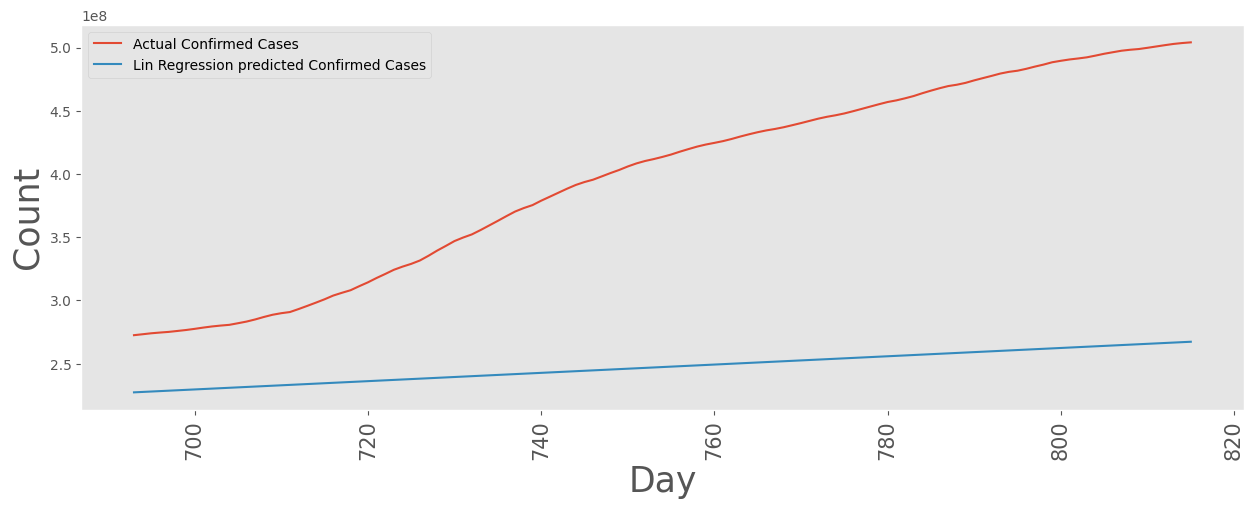

MAE: 247340631.0413324
MSE: 6.131304673131984e+16


In [ ]:
plt.figure(figsize = [15,5])
# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")
# plotting the predicited values for the future days
plt.plot(X_test,
         test_lin_pred,
         label = "Lin Regression predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

mae_lr = mean_absolute_error (test_lin_pred, X_test)
mse_lr = mean_squared_error  (test_lin_pred, X_test)
print('MAE:', mae_lr)
print('MSE:', mse_lr)

#### Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=5)
poly_X_train = poly.fit_transform(X_train)
poly_X_test  = poly.fit_transform(X_test)
poly_X = poly.fit_transform(X)

In [ ]:
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(poly_X_train, y_train)
test_poly_pred = linear_model.predict(poly_X_test)
poly_pred = linear_model.predict(poly_X)


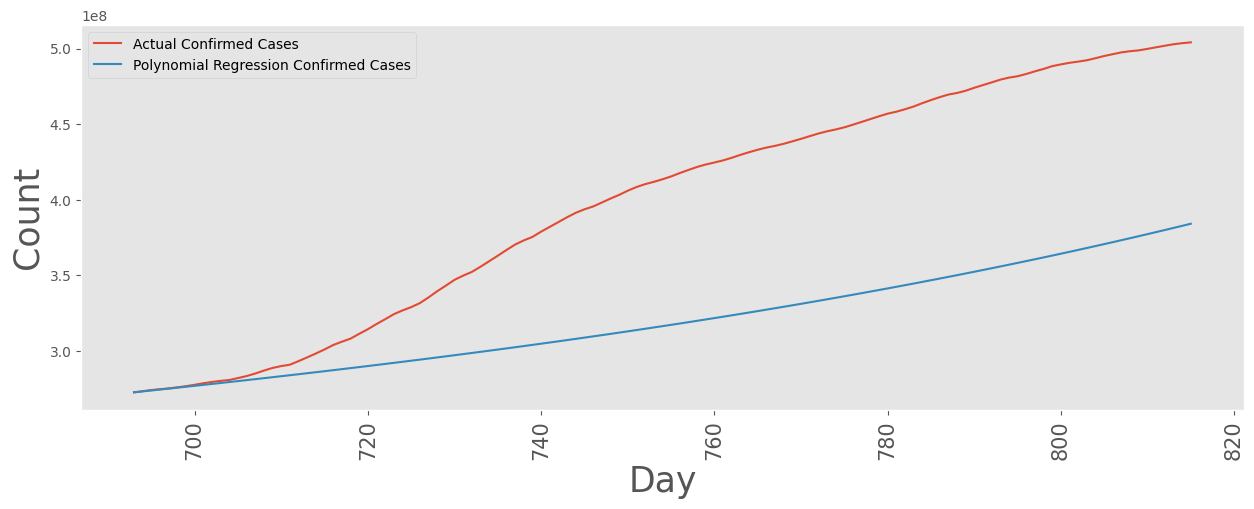

MAE: 77294774.51605496
MSE: 8068180713630094.0


In [ ]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         test_poly_pred,
         label = "Polynomial Regression Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

mae_poly = mean_absolute_error(test_poly_pred, y_test)
mse_poly = mean_squared_error(test_poly_pred, y_test)
print('MAE:', mae_poly)
print('MSE:',mse_poly)

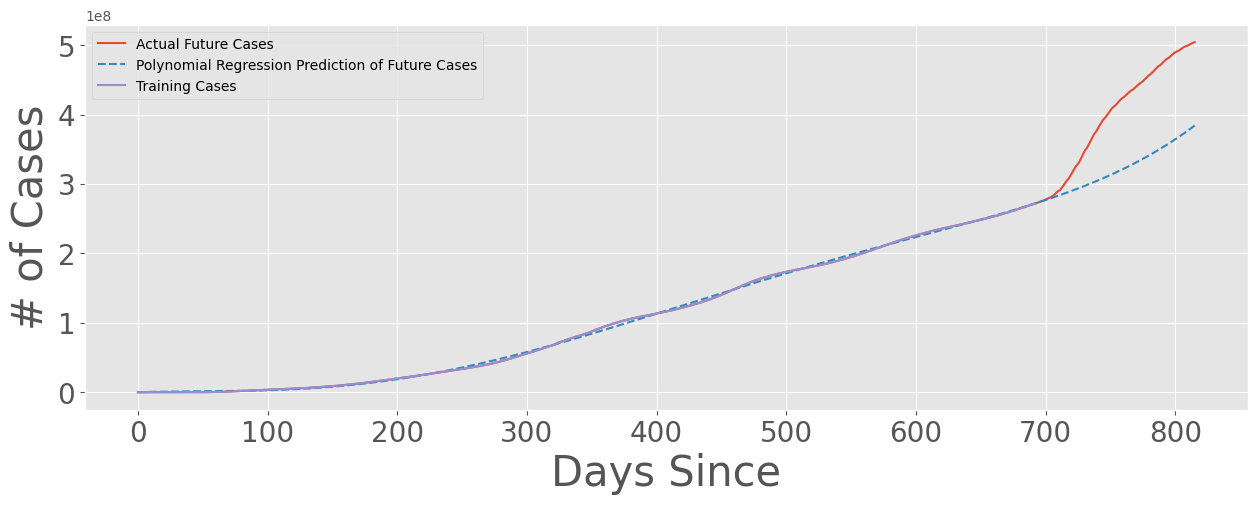

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')

plt.plot(X,
         poly_pred,
         label = 'Polynomial Regression Prediction of Future Cases',
         linestyle = "dashed")

plt.plot(X_train,
         y_train,
         label = 'Training Cases')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### 9.2 Ridge Regression

In [ ]:
tol      = [1e-4, 1e-3, 1e-2]
alpha_1  = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2  = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol,
                 'alpha_1': alpha_1,
                 'alpha_2' : alpha_2,
                 'lambda_1': lambda_1,
                 'lambda_2' : lambda_2 }

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)

bayesian_search.fit(X_train, y_train)

print(bayesian_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 0.01, 'lambda_2': 0.0001, 'lambda_1': 1e-05, 'alpha_2': 0.0001, 'alpha_1': 0.0001}


In [ ]:
y_test_ridge_pred = bayesian_search.predict(X_test);
y_ridge_pred = bayesian_search.predict(X);

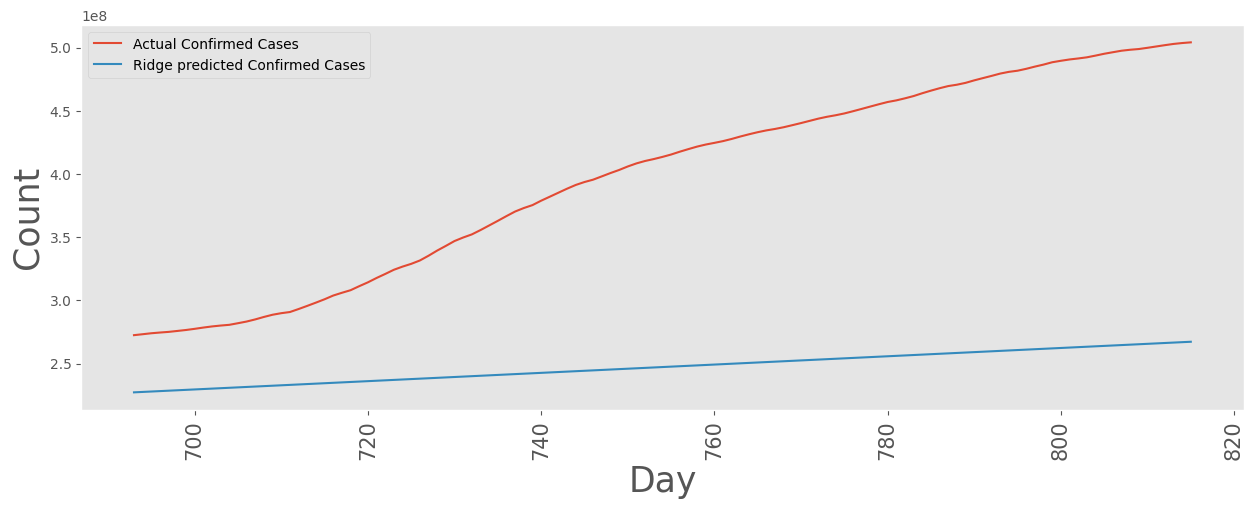

MAE: 247320825.36488137
MSE: 6.130322790178433e+16


In [ ]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         y_test_ridge_pred,
         label = "Ridge predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

mae_br = mean_absolute_error (y_test_ridge_pred, X_test)
mse_br = mean_squared_error  (y_test_ridge_pred, X_test)
print('MAE:', mae_br)
print('MSE:', mse_br)

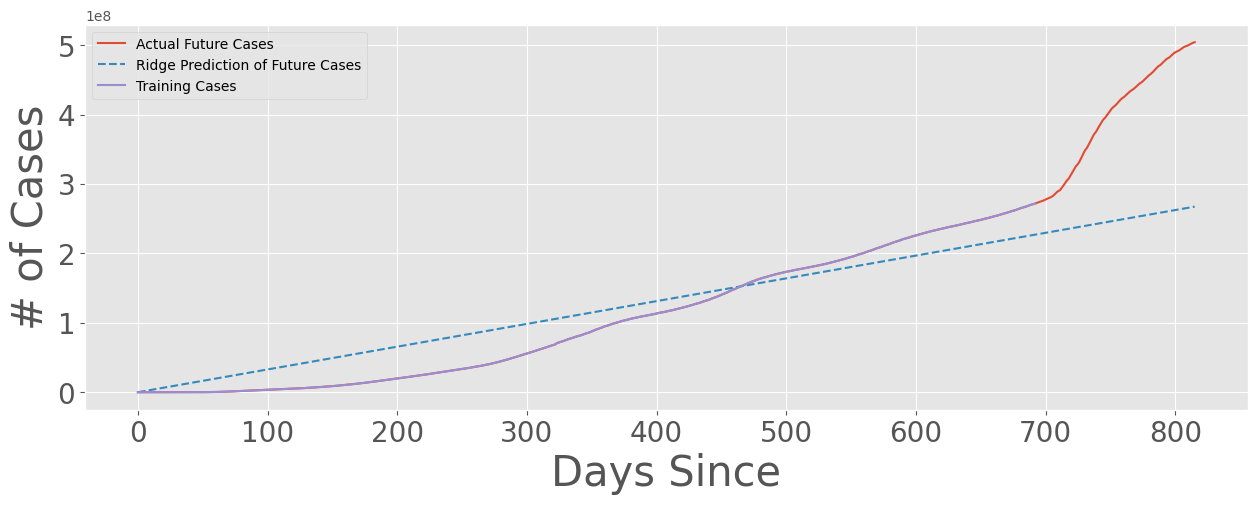

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')
plt.plot(X,
         y_ridge_pred,
         label = 'Ridge Prediction of Future Cases',
         linestyle = "dashed")
plt.plot(X_train,
         y_train,
         label = 'Training Cases')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#### Polynomial Ridge Regression

In [ ]:
bayesian_search_poly = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)


In [ ]:
bayesian_search_poly.fit(poly_X_train, y_train);
print(bayesian_search_poly.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 0.0001, 'lambda_2': 0.0001, 'lambda_1': 1e-07, 'alpha_2': 1e-05, 'alpha_1': 1e-05}


In [ ]:
bayesian_poly_confirmed = bayesian_search_poly.best_estimator_
test_poly_bayesian_pred = bayesian_poly_confirmed.predict(poly_X_test)
bayesian_poly_pred = bayesian_poly_confirmed.predict(poly_X)

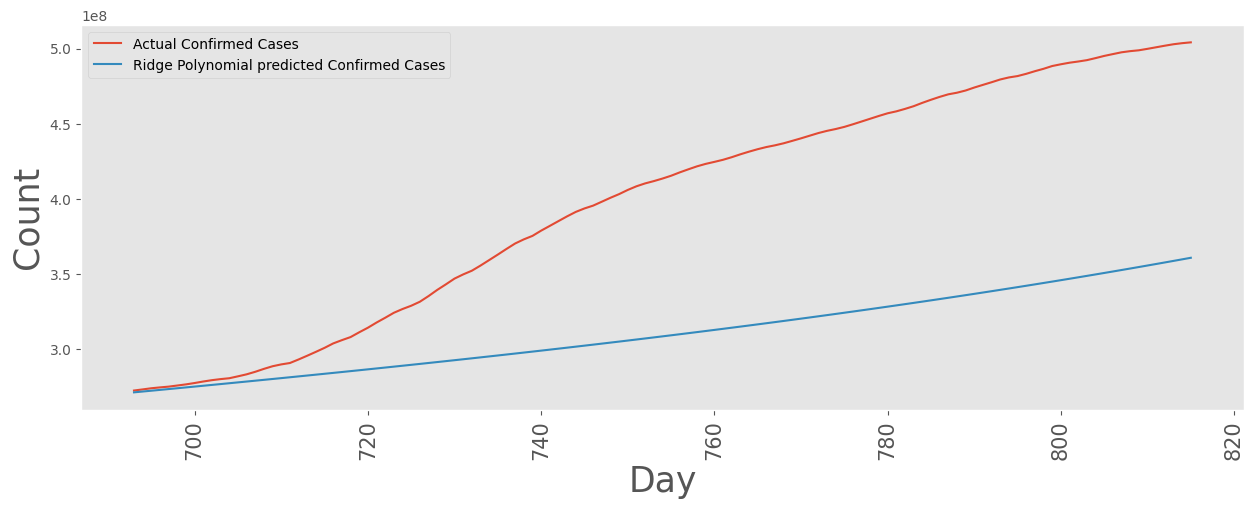

MAE: 86576701.30602975
MSE: 1.0138729097543158e+16


In [ ]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         test_poly_bayesian_pred,
         label = "Ridge Polynomial predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

mae_pr = mean_absolute_error(test_poly_bayesian_pred, y_test)
mse_pr = mean_squared_error (test_poly_bayesian_pred, y_test)
print ('MAE:', mae_pr)
print ('MSE:', mse_pr)

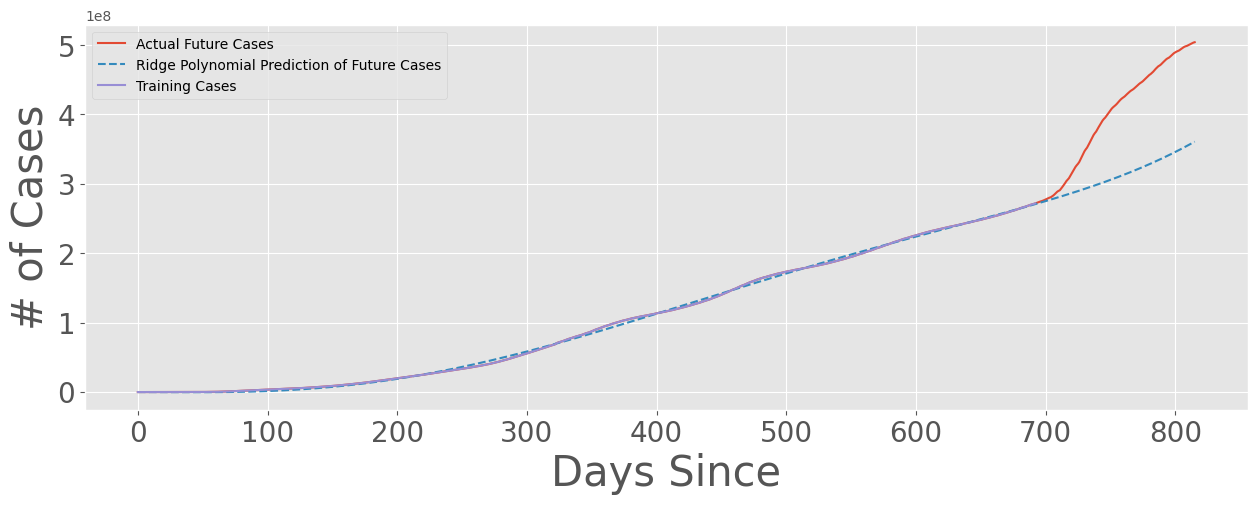

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')
plt.plot(X,
         bayesian_poly_pred,
         label = 'Ridge Polynomial Prediction of Future Cases',
         linestyle = "dashed")
plt.plot(X_train,
         y_train,
         label = 'Training Cases')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
#plt.grid()
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
print("Polynomial Regression ")
print('\tMAE:', mean_absolute_error(test_poly_pred, y_test))
print('\tMSE:',mean_squared_error(test_poly_pred, y_test))

print("\nRidge Polynomial Regression ")
print ('\tMAE:', mean_absolute_error(test_poly_bayesian_pred, y_test))
print ('\tMSE:', mean_squared_error (test_poly_bayesian_pred, y_test))

Polynomial Regression 
	MAE: 77294774.51605496
	MSE: 8068180713630094.0

Ridge Polynomial Regression 
	MAE: 86576701.30602975
	MSE: 1.0138729097543158e+16


From Mean Absolute Error and Mean Squared Error values, Ridge Polynomial Regression Model seems to be the best model.

In [ ]:
import pandas as pd

# Create a dictionary to store model metrics
results_summary = {
    'Model': [
        'Linear Regression',
        'Polynomial Regression',
        'Bayesian Ridge Regression',
        'Polynomial Ridge Regression'
    ],
    'MAE': [
        mae_lr,
        mae_poly,
        mae_br,
        mae_pr
    ],
    'MSE': [
        mse_lr,
        mse_poly,
        mse_br,
        mse_pr
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(results_summary)

# Sort by MAE (lower is better)
results_df = results_df.sort_values(by='MAE')

# Format numbers with commas (no scientific notation)
results_df['MAE'] = results_df['MAE'].apply(lambda x: f"{x:,.0f}")
results_df['MSE'] = results_df['MSE'].apply(lambda x: f"{x:,.0f}")

# Display the results
print("Model Performance Summary:")
display(results_df)

# Optionally save to CSV
results_df.to_csv('model_results_summary.csv', index=False)


Model Performance Summary:


,Model,MAE,MSE
1,Polynomial Regression,"77,294,775","8,068,180,713,630,094"
3,Polynomial Ridge Regression,"86,576,701","10,138,729,097,543,158"
2,Bayesian Ridge Regression,"247,320,825","61,303,227,901,784,328"
0,Linear Regression,"247,340,631","61,313,046,731,319,840"


##  Conclusion

From the model comparison table above, we can see:

- **Polynomial Regression** achieved the lowest Mean Absolute Error (MAE), indicating the best predictive performance on this dataset.
- **Polynomial Ridge Regression** also performed well, showing that adding regularization to polynomial features can still keep accuracy high while potentially improving generalization.
- **Bayesian Ridge Regression** and **Linear Regression** had much higher errors, suggesting that the growth pattern in COVID-19 cases is **non-linear** and not well captured by simple linear models.

**Key Takeaways:**
- Epidemic growth often follows a curve that benefits from polynomial feature expansion.
- Regularization (Ridge/Bayesian) is useful for noisy data but may not always outperform pure polynomial models if over-regularized.
- The methodology used here can be adapted for other **time-series forecasting problems** such as sales predictions, stock prices, or other disease outbreaks.



---


# Project: Regression analysis on a COVID-dataset


# COVID-19 Case Prediction Using Regression Models

**Project — Regression analysis on a COVID-dataset**

**Goal:** Predict early COVID-19 confirmed cases using regression and regularization techniques. This notebook includes data loading, preprocessing, EDA, multiple regression models (Linear, Polynomial, Bayesian Ridge), hyperparameter tuning, model evaluation (MAE & MSE), and visualizations.






# COVID-19 Case Prediction Using Regression Models

This project applies multiple regression techniques to forecast COVID-19 confirmed case counts using publicly available consolidated data.  
It is structured as an end-to-end machine learning pipeline — from data loading and preprocessing to model selection, evaluation, and results interpretation.

**Dataset:**  
We use `time-series-19-covid-combined.csv` from the [COVID-19 Data Repository on GitHub](https://github.com/datasets/covid-19), which contains:
- **Date**
- **Country/Region**
- **Confirmed** cases
- **Deaths**
- **Recovered**

**Objective:**  
Predict future confirmed case counts based on historical data trends, comparing:
- Linear Regression
- Polynomial Regression
- Bayesian Ridge Regression
- Polynomial Ridge Regression

**Evaluation Metrics:**
- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)

---


## Data Analysis

### 1. **Load the data** into a pandas dataframe.


In this section, we load the COVID-19 dataset directly from GitHub, check its structure, and perform basic cleaning if needed.


In [ ]:
# Imports
import pandas as pd
import numpy  as np
import scipy.integrate

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

import copy
from   sklearn.metrics       import mean_squared_error, mean_absolute_error
from   sklearn.linear_model  import LinearRegression, BayesianRidge
from   sklearn.tree          import DecisionTreeRegressor
from   sklearn.preprocessing import PolynomialFeatures

In [ ]:
path = "https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv"
df_orig = pd.read_csv(path)
print(df_orig)

              Date Country/Region Province/State  Confirmed  Recovered  Deaths
0       2020-01-22    Afghanistan            NaN          0        0.0       0
1       2020-01-23    Afghanistan            NaN          0        0.0       0
2       2020-01-24    Afghanistan            NaN          0        0.0       0
3       2020-01-25    Afghanistan            NaN          0        0.0       0
4       2020-01-26    Afghanistan            NaN          0        0.0       0
...            ...            ...            ...        ...        ...     ...
231739  2022-04-12       Zimbabwe            NaN     247094        0.0    5460
231740  2022-04-13       Zimbabwe            NaN     247160        0.0    5460
231741  2022-04-14       Zimbabwe            NaN     247208        0.0    5462
231742  2022-04-15       Zimbabwe            NaN     247237        0.0    5462
231743  2022-04-16       Zimbabwe            NaN     247237        0.0    5462

[231744 rows x 6 columns]


### 2. Create a new dataframe which counts the cumulative total number of cases, the cumulative total number of deaths, and also  cumulative total number of recoveries for each date.

In [ ]:
df = copy.deepcopy(df_orig)
date_lst  = df.Date.unique()
date_dict = {}

for i in range(len(date_lst)):
    df_temp = df.loc[df['Date'] == date_lst[i]]
    date_dict[date_lst[i]] = df_temp

In [ ]:
date_tot_tup_dict = {};
for date, df in date_dict.items():
    tup_temp = (df['Confirmed'].sum(), df['Deaths'].sum(), df['Recovered'].sum())
    date_tot_tup_dict[date] = tup_temp


In [ ]:
print(date_tot_tup_dict)

{'2020-01-22': (np.int64(557), np.int64(17), np.float64(30.0)), '2020-01-23': (np.int64(657), np.int64(18), np.float64(32.0)), '2020-01-24': (np.int64(944), np.int64(26), np.float64(39.0)), '2020-01-25': (np.int64(1437), np.int64(42), np.float64(42.0)), '2020-01-26': (np.int64(2120), np.int64(56), np.float64(56.0)), '2020-01-27': (np.int64(2929), np.int64(82), np.float64(65.0)), '2020-01-28': (np.int64(5580), np.int64(131), np.float64(108.0)), '2020-01-29': (np.int64(6169), np.int64(133), np.float64(127.0)), '2020-01-30': (np.int64(8237), np.int64(171), np.float64(145.0)), '2020-01-31': (np.int64(9927), np.int64(213), np.float64(225.0)), '2020-02-01': (np.int64(12038), np.int64(259), np.float64(287.0)), '2020-02-02': (np.int64(16787), np.int64(362), np.float64(476.0)), '2020-02-03': (np.int64(19887), np.int64(426), np.float64(627.0)), '2020-02-04': (np.int64(23899), np.int64(492), np.float64(857.0)), '2020-02-05': (np.int64(27644), np.int64(564), np.float64(1130.0)), '2020-02-06': (np.

In [ ]:
df_date_tots = pd.DataFrame(date_tot_tup_dict)
df_date_tots = df_date_tots.transpose()
df_date_tots.columns = ['Confirmed', 'Deaths', 'Recovered']
print(df_date_tots.head())

            Confirmed  Deaths  Recovered
2020-01-22      557.0    17.0       30.0
2020-01-23      657.0    18.0       32.0
2020-01-24      944.0    26.0       39.0
2020-01-25     1437.0    42.0       42.0
2020-01-26     2120.0    56.0       56.0


### 3. Create a new column in the dataframe called **“closed cases”**

In [ ]:
df_date_tots['Closed Cases'] = df_date_tots['Deaths'] + df_date_tots['Recovered']

### 4. Create a new column in the dataframe called “active cases”

In [ ]:
df_date_tots['Active Cases'] = df_date_tots['Confirmed'] - df_date_tots['Closed Cases']

### 5. **Plot** the total number of cases per day over time and summarize findings

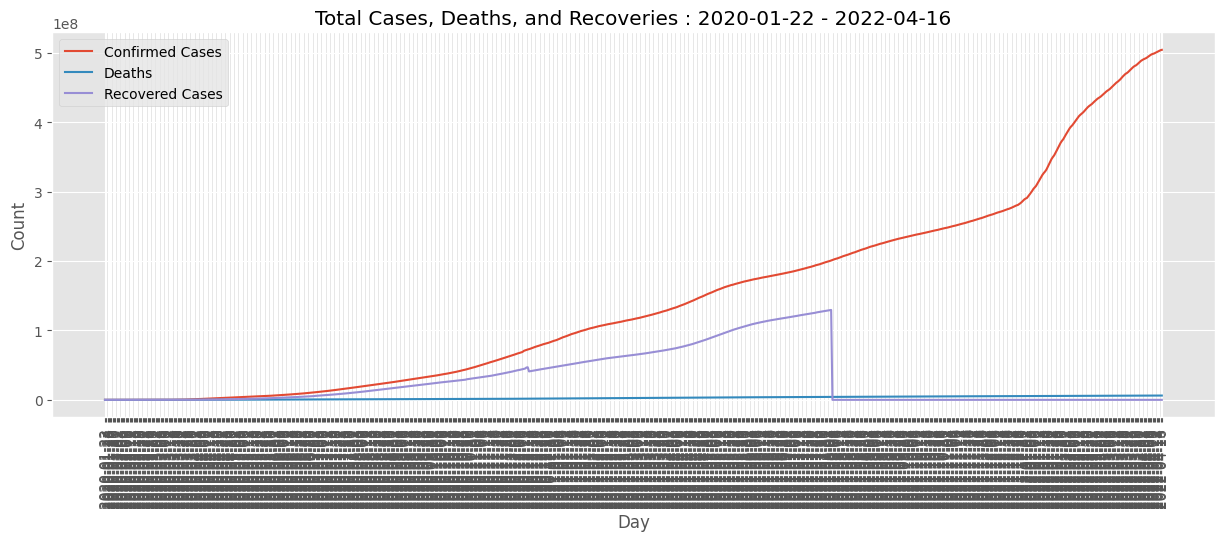

In [ ]:
plt.figure(figsize = [15,5])
plt.plot(df_date_tots['Confirmed'], label = "Confirmed Cases")
plt.plot(df_date_tots['Deaths'], label    = "Deaths")
plt.plot(df_date_tots['Recovered'], label = "Recovered Cases")

plt.legend()
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90);
start_date = str(date_lst[0]);
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Total Cases, Deaths, and Recoveries : " + start_date + " - " + fin_date);


All of the three curves seem to be exponential (start of logistic curve). The confirmed cases was obviously higher than the deaths and recovered cases. The rate of the the recovered cases seems to be higher than that of the death curve.

### 6. Create one **plot** showing the trend of number of active cases and closed cases

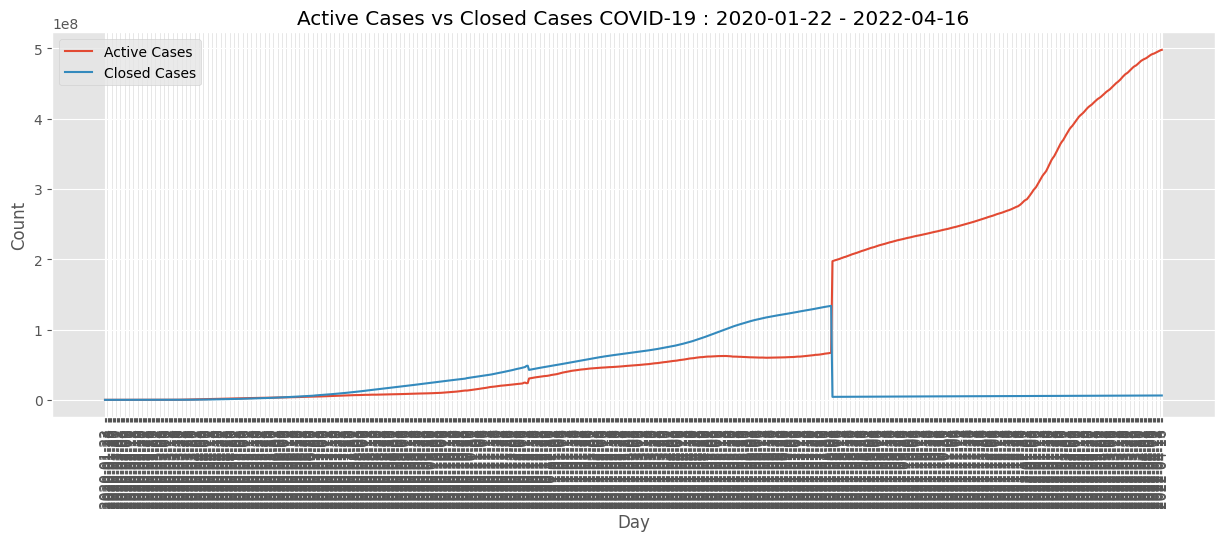

In [ ]:
plt.figure(figsize = [15,5])
plt.plot(df_date_tots['Active Cases'], label = "Active Cases")
plt.plot(df_date_tots['Closed Cases'], label = "Closed Cases")

plt.legend();
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90)
start_date = str(date_lst[0])
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Active Cases vs Closed Cases COVID-19 : " + start_date + " - " + fin_date);

The number of active cases is higher than the number of closed cases as of yet.

### 7. Growth Factor

**Growth factor** is the factor by which a quantity multiplies itself over time. In the below cell, we calculate the GF of the confirmed, recovered and death cases.


In [ ]:
growth_len_lst = len(date_lst) - 1
confirmed_lst = df_date_tots["Confirmed"]
death_lst = df_date_tots["Deaths"]
recovered_lst = df_date_tots["Recovered"]
confGF_lst = []
deathsGF_lst = []
recovGF_lst = []
for i in range(growth_len_lst):
    confirmedGF = confirmed_lst[i+1] / confirmed_lst[i]
    confGF_lst.append(confirmedGF)
    deathGF = death_lst[i+1] / death_lst[i]
    deathsGF_lst.append(deathGF)
    recoveredGF = recovered_lst[i+1] / recovered_lst[i]
    recovGF_lst.append(recoveredGF);


/tmp/ipython-input-3700421734.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confirmedGF = confirmed_lst[i+1] / confirmed_lst[i]
/tmp/ipython-input-3700421734.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  deathGF = death_lst[i+1] / death_lst[i]
/tmp/ipython-input-3700421734.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  recoveredGF = recovered_lst[i+1] / recovered_lst[i]
/tmp/ipython-input-3700421734.py:13: Runtime

### 8. Create one plot showing the Growth factor of confirmed, recovered and death cases wrt days

Text(0.5, 1.0, 'Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : 2020-01-22 - 2022-04-16')

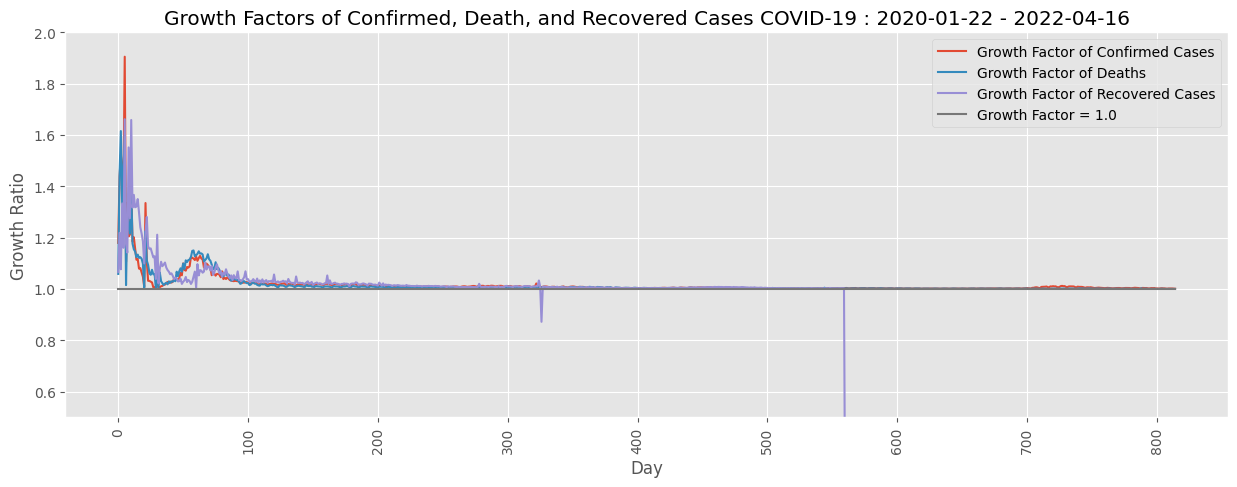

In [ ]:
plt.figure(figsize = [15,5])
plt.plot(confGF_lst, label = "Growth Factor of Confirmed Cases")
plt.plot(deathsGF_lst, label = "Growth Factor of Deaths")
plt.plot(recovGF_lst, label = "Growth Factor of Recovered Cases")
x = []
for i in range((growth_len_lst)):
    x.append(1)
plt.plot(x, label = "Growth Factor = 1.0")

#plt.grid()
plt.legend()
plt.xlabel("Day")
plt.ylabel("Growth Ratio")
plt.ylim(.5,2)
plt.xticks(rotation = 90)
start_date = str(date_lst[0])
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : " +start_date +" - " +fin_date)

# **Part 2 - Prediction Using Linear Regression**

#### To make our data to be compatible with *sklearn* format, create a new column called “Days since” which tracks the number of days since the initial date.

In [ ]:
days_since_lst = []
for i in range(len(date_lst)):
    days_since_lst.append(i)
df_date_tots["Days Since:"] = days_since_lst
df_date_tots = df_date_tots[["Days Since:", "Confirmed", "Deaths", "Recovered", "Active Cases", "Closed Cases"]]


### 8. Take the earliest 85% of the dates as **train** and the rest as **test**

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

X = np.array(df_date_tots["Days Since:"]).reshape(-1,1)
y = np.array(df_date_tots["Confirmed"])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.15,
                                                    shuffle = False)

### 9. We can try different regression and regularizations we have seen before

#### 9.1 Linear Regression

In [ ]:
lin_model = LinearRegression(fit_intercept = False)
lin_model.fit(X_train, y_train)
test_lin_pred = lin_model.predict(X_test)
lin_pred = lin_model.predict(X)

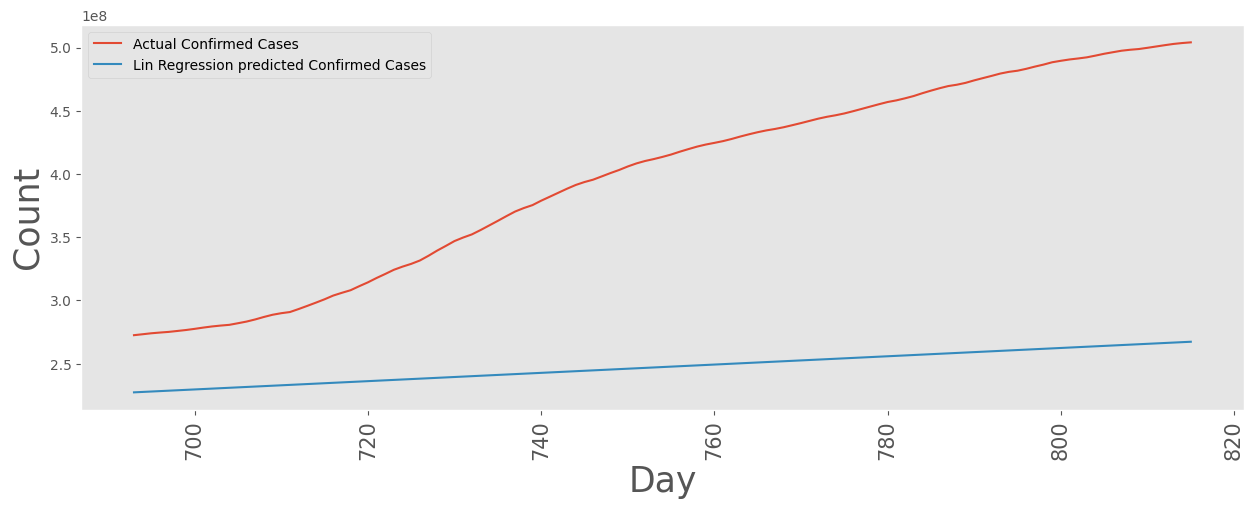

MAE: 247340631.0413324
MSE: 6.131304673131984e+16


In [ ]:
plt.figure(figsize = [15,5])
# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")
# plotting the predicited values for the future days
plt.plot(X_test,
         test_lin_pred,
         label = "Lin Regression predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

mae_lr = mean_absolute_error (test_lin_pred, X_test)
mse_lr = mean_squared_error  (test_lin_pred, X_test)
print('MAE:', mae_lr)
print('MSE:', mse_lr)

#### Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=5)
poly_X_train = poly.fit_transform(X_train)
poly_X_test  = poly.fit_transform(X_test)
poly_X = poly.fit_transform(X)

In [ ]:
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(poly_X_train, y_train)
test_poly_pred = linear_model.predict(poly_X_test)
poly_pred = linear_model.predict(poly_X)


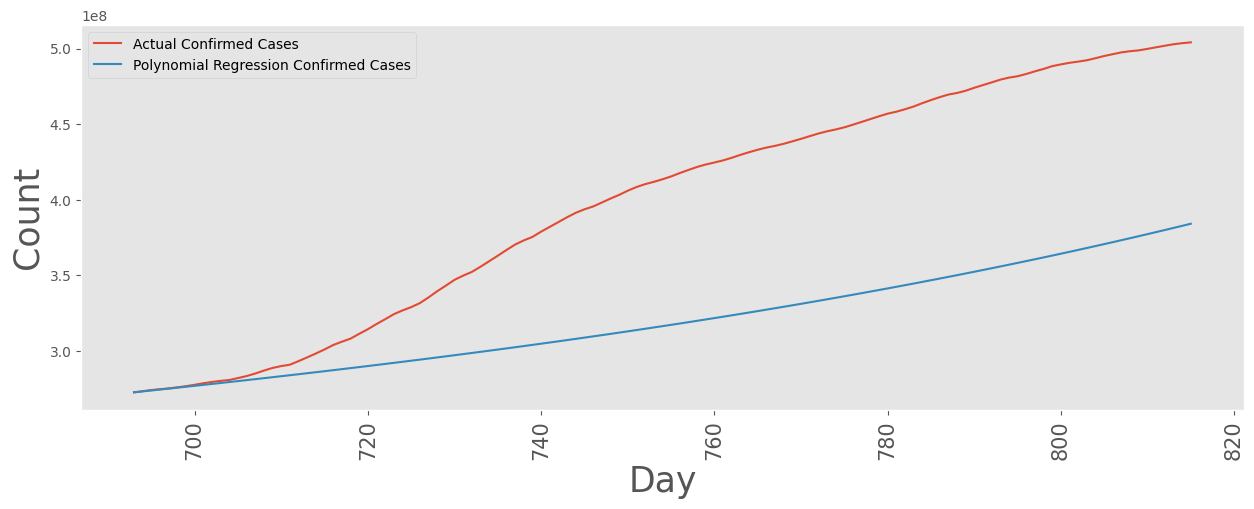

MAE: 77294774.51605496
MSE: 8068180713630094.0


In [ ]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         test_poly_pred,
         label = "Polynomial Regression Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

mae_poly = mean_absolute_error(test_poly_pred, y_test)
mse_poly = mean_squared_error(test_poly_pred, y_test)
print('MAE:', mae_poly)
print('MSE:',mse_poly)

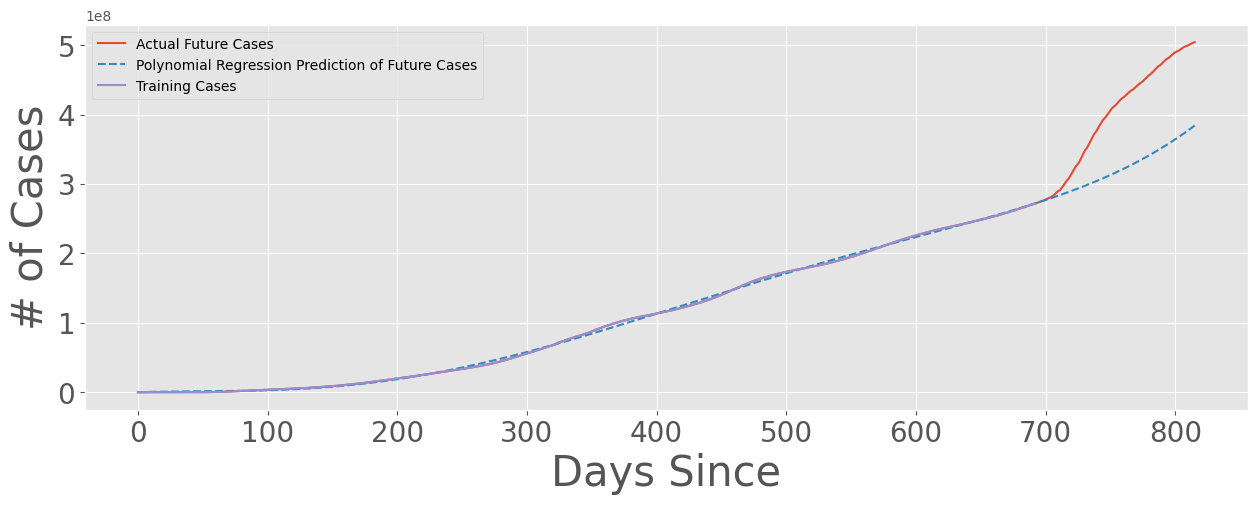

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')

plt.plot(X,
         poly_pred,
         label = 'Polynomial Regression Prediction of Future Cases',
         linestyle = "dashed")

plt.plot(X_train,
         y_train,
         label = 'Training Cases')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### 9.2 Ridge Regression

In [ ]:
tol      = [1e-4, 1e-3, 1e-2]
alpha_1  = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2  = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol,
                 'alpha_1': alpha_1,
                 'alpha_2' : alpha_2,
                 'lambda_1': lambda_1,
                 'lambda_2' : lambda_2 }

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)

bayesian_search.fit(X_train, y_train)

print(bayesian_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 0.01, 'lambda_2': 0.0001, 'lambda_1': 1e-05, 'alpha_2': 0.0001, 'alpha_1': 0.0001}


In [ ]:
y_test_ridge_pred = bayesian_search.predict(X_test);
y_ridge_pred = bayesian_search.predict(X);

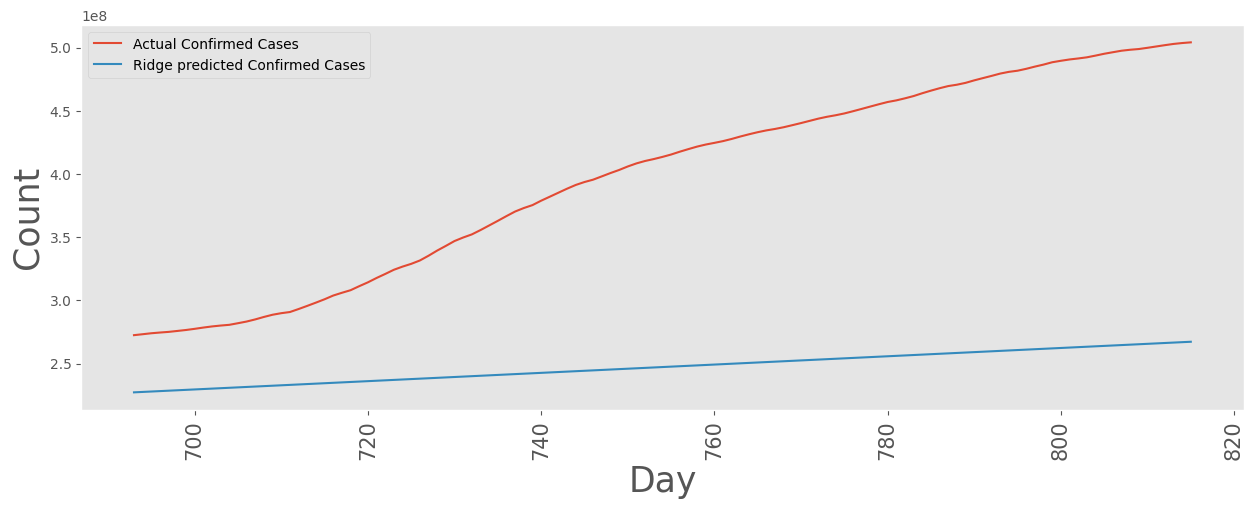

MAE: 247320825.36488137
MSE: 6.130322790178433e+16


In [ ]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         y_test_ridge_pred,
         label = "Ridge predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

mae_br = mean_absolute_error (y_test_ridge_pred, X_test)
mse_br = mean_squared_error  (y_test_ridge_pred, X_test)
print('MAE:', mae_br)
print('MSE:', mse_br)

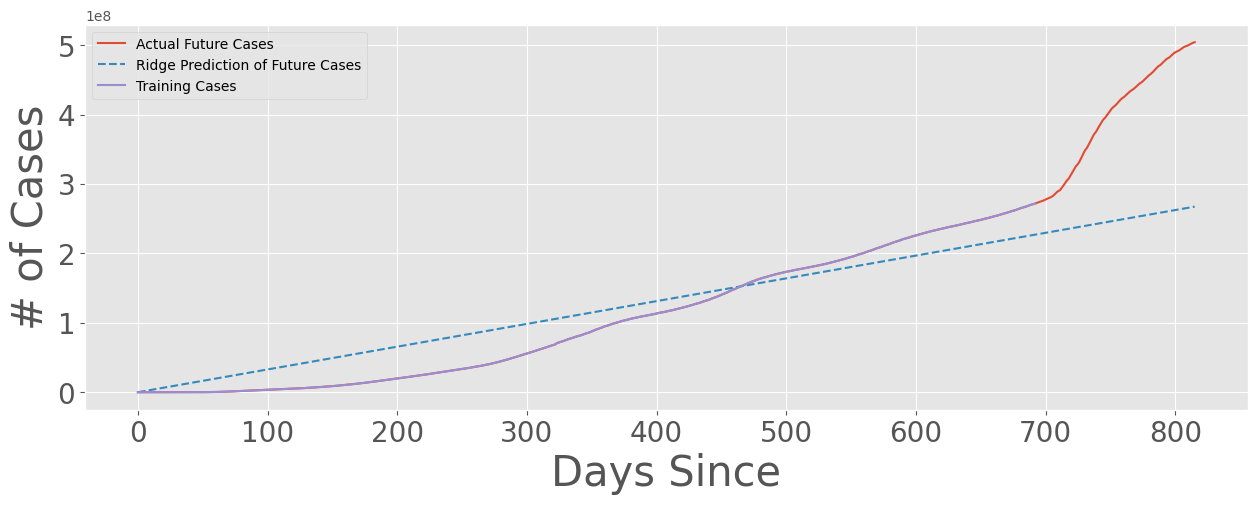

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')
plt.plot(X,
         y_ridge_pred,
         label = 'Ridge Prediction of Future Cases',
         linestyle = "dashed")
plt.plot(X_train,
         y_train,
         label = 'Training Cases')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#### Polynomial Ridge Regression

In [ ]:
bayesian_search_poly = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)


In [ ]:
bayesian_search_poly.fit(poly_X_train, y_train);
print(bayesian_search_poly.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 0.0001, 'lambda_2': 0.0001, 'lambda_1': 1e-07, 'alpha_2': 1e-05, 'alpha_1': 1e-05}


In [ ]:
bayesian_poly_confirmed = bayesian_search_poly.best_estimator_
test_poly_bayesian_pred = bayesian_poly_confirmed.predict(poly_X_test)
bayesian_poly_pred = bayesian_poly_confirmed.predict(poly_X)

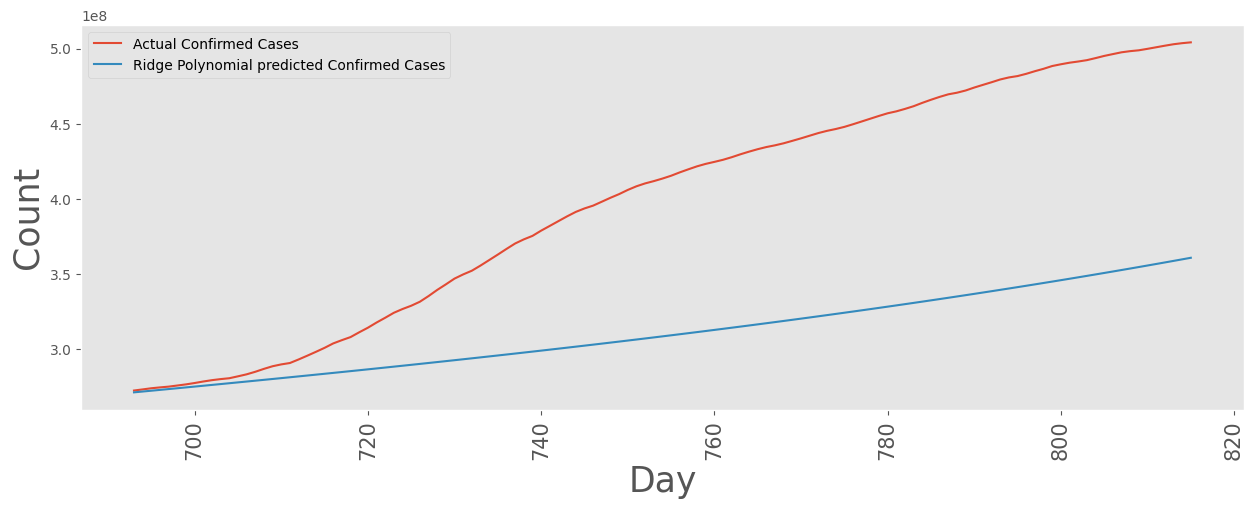

MAE: 86576701.30602975
MSE: 1.0138729097543158e+16


In [ ]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         test_poly_bayesian_pred,
         label = "Ridge Polynomial predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

mae_pr = mean_absolute_error(test_poly_bayesian_pred, y_test)
mse_pr = mean_squared_error (test_poly_bayesian_pred, y_test)
print ('MAE:', mae_pr)
print ('MSE:', mse_pr)

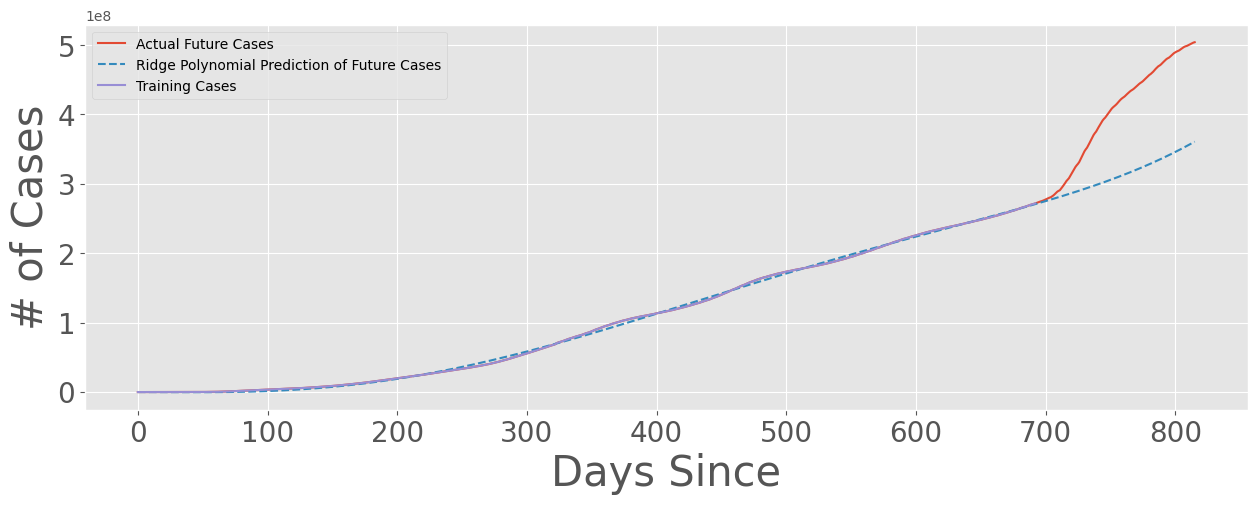

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')
plt.plot(X,
         bayesian_poly_pred,
         label = 'Ridge Polynomial Prediction of Future Cases',
         linestyle = "dashed")
plt.plot(X_train,
         y_train,
         label = 'Training Cases')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
#plt.grid()
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
print("Polynomial Regression ")
print('\tMAE:', mean_absolute_error(test_poly_pred, y_test))
print('\tMSE:',mean_squared_error(test_poly_pred, y_test))

print("\nRidge Polynomial Regression ")
print ('\tMAE:', mean_absolute_error(test_poly_bayesian_pred, y_test))
print ('\tMSE:', mean_squared_error (test_poly_bayesian_pred, y_test))

Polynomial Regression 
	MAE: 77294774.51605496
	MSE: 8068180713630094.0

Ridge Polynomial Regression 
	MAE: 86576701.30602975
	MSE: 1.0138729097543158e+16


From Mean Absolute Error and Mean Squared Error values, Ridge Polynomial Regression Model seems to be the best model.

In [ ]:
import pandas as pd

# Create a dictionary to store model metrics
results_summary = {
    'Model': [
        'Linear Regression',
        'Polynomial Regression',
        'Bayesian Ridge Regression',
        'Polynomial Ridge Regression'
    ],
    'MAE': [
        mae_lr,
        mae_poly,
        mae_br,
        mae_pr
    ],
    'MSE': [
        mse_lr,
        mse_poly,
        mse_br,
        mse_pr
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(results_summary)

# Sort by MAE (lower is better)
results_df = results_df.sort_values(by='MAE')

# Format numbers with commas (no scientific notation)
results_df['MAE'] = results_df['MAE'].apply(lambda x: f"{x:,.0f}")
results_df['MSE'] = results_df['MSE'].apply(lambda x: f"{x:,.0f}")

# Display the results
print("Model Performance Summary:")
display(results_df)

# Optionally save to CSV
results_df.to_csv('model_results_summary.csv', index=False)


Model Performance Summary:


,Model,MAE,MSE
1,Polynomial Regression,"77,294,775","8,068,180,713,630,094"
3,Polynomial Ridge Regression,"86,576,701","10,138,729,097,543,158"
2,Bayesian Ridge Regression,"247,320,825","61,303,227,901,784,328"
0,Linear Regression,"247,340,631","61,313,046,731,319,840"


##  Conclusion

From the model comparison table above, we can see:

- **Polynomial Regression** achieved the lowest Mean Absolute Error (MAE), indicating the best predictive performance on this dataset.
- **Polynomial Ridge Regression** also performed well, showing that adding regularization to polynomial features can still keep accuracy high while potentially improving generalization.
- **Bayesian Ridge Regression** and **Linear Regression** had much higher errors, suggesting that the growth pattern in COVID-19 cases is **non-linear** and not well captured by simple linear models.

**Key Takeaways:**
- Epidemic growth often follows a curve that benefits from polynomial feature expansion.
- Regularization (Ridge/Bayesian) is useful for noisy data but may not always outperform pure polynomial models if over-regularized.
- The methodology used here can be adapted for other **time-series forecasting problems** such as sales predictions, stock prices, or other disease outbreaks.



---
